In [1]:
import re
import pickle
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict 

In [24]:

def getRatings(fileName, ratingsDict):
    ratings  = pickle.load( open( fileName, "rb" ) )

    # print(ratings)

    for key, value in ratings.items():
        index = key.split('_')[1]
        ratingsDict['maxIndex'] = max(ratingsDict['maxIndex'], int(index))  
        
        ratingsDict['Craftsmanship'][key].append(value['craftsmanship'])
        ratingsDict['Creativity'][key].append(value['creativity'])
        ratingsDict['Consistency'][key].append(value['consistency'])

    return ratingsDict



def plotRatings(ratingsDict, criteria):
    size = ratingsDict['maxIndex'] + 1
    img = np.zeros((size,size), dtype=np.float32)
    # baseModelRatings = ratingsDict[criteria]['0_0']
    # # print(baseModelRatings)
    # # img *= sum(baseModelRatings)/len(baseModelRatings)


    for key, value in ratingsDict[criteria].items():
        x,y = key.split('_')
        x = int(x)
        y = int(y)
        if len(value) > 0:
            img[x, y] = sum(value)/len(value)

    plt.figure()
    plt.imshow(img)#/ max(img.max(), 1e-8), cmap='gray')

    plt.title(criteria)
    plt.ylabel('Repeat start layer')
    plt.xlabel('Repeat stop layer')
    return img

def print_rating(img):
    print(f"Maximum Value for combined: {np.unravel_index(np.argmax(img), np.array(img).shape)}, with value: {np.max(img)}")

def topN(ratingsData, criteria, n):
    # Compute averages and store them with keys
    averages = [(key, sum(values) / len(values)) for key, values in ratingsData[criteria].items() if values]

    # Sort based on the averages
    averages.sort(key=lambda x: x[1], reverse=True)

    # Select the top n keys and their averages
    top_n_keys_with_averages = averages[:n]

    print(f"Top {n} keys with their averages for {criteria}:")
    for key, avg in top_n_keys_with_averages:
        print(f"Key: {key}, Average: {avg}")



def plotHistograms(ratingsDict1, criteria):
    ratingList = []
    for l in ratingsDict1[criteria].values():
        ratingList.extend(l)

    plt.hist(ratingList, bins=100, edgecolor='black')

    # Adding labels and title
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title(f'{criteria} Ratings')
    plt.xlim(0, 10)

    print(np.mean(ratingsDict1[criteria]['0_0']))

    plt.vlines(np.mean(ratingsDict1[criteria]['0_0']), 0, 100, colors='r', linestyles='dashed', label='Mean')
    # Show the plot
    plt.show()

def getStandardDeviation(ratingsDict, criteria):
    ratingList = []
    for l in ratingsDict[criteria].values():
        ratingList.append(np.std(l))

    return np.mean(ratingList)

# TinyLlama

here
defaultdict(<function <lambda> at 0x7f15637d0430>, {'maxIndex': 21, 'Craftsmanship': defaultdict(<class 'list'>, {'1_0': [5, 3, 5, 4, 6, 5, 5, 4, 5], '2_0': [5, 10, 4, 9, 5, 4, 0, 6, 5], '3_0': [5, 4, 10, 4, 6, 0, 8, 6, 6], '4_0': [5, 4, 6, 5, 5, 4, 4, 5, 4], '5_0': [6, 5, 5, 5, 5, 1, 4, 6, 3], '6_0': [6, 10, 6, 10, 0, 5, 5, 5, 6], '7_0': [5, 7, 6, 1, 0, 5, 6, 4, 5], '8_0': [5, 4, 5, 6, 6, 4, 0, 10, 4], '9_0': [5, 9, 5, 4, 5, 6, 1, 5, 5], '0_0': [1, 0, 5, 4, 5, 5, 1, 1, 5], '0_1': [5, 6, 6, 6, 4, 5, 4, 5, 5], '0_2': [5, 2, 3, 5, 4, 4, 5, 6, 5], '1_2': [5, 4, 10, 8, 5, 5, 4, 5, 6], '0_3': [5, 5, 5, 5, 5, 5, 5, 3, 0], '1_3': [5, 5, 7, 5, 5, 8, 5, 7, 5], '2_3': [8, 0, 5, 6, 5, 5, 5, 4, 5], '0_4': [6, 6, 5, 4, 6, 1, 5, 4, 5], '1_4': [8, 5, 6, 4, 5, 5, 5, 5, 1], '2_4': [5, 5, 5, 5, 0, 5, 10, 5, 5], '3_4': [5, 10, 6, 5, 4, 5, 4, 5, 5], '0_5': [4, 5, 5, 0, 0, 5, 0, 5, 7], '1_5': [0, 6, 5, 5, 5, 3, 6, 5, 5], '2_5': [10, 5, 5, 6, 5, 0, 5, 0, 6], '3_5': [5, 5, 5, 5, 1, 5, 10, 5, 6], '4_5': 

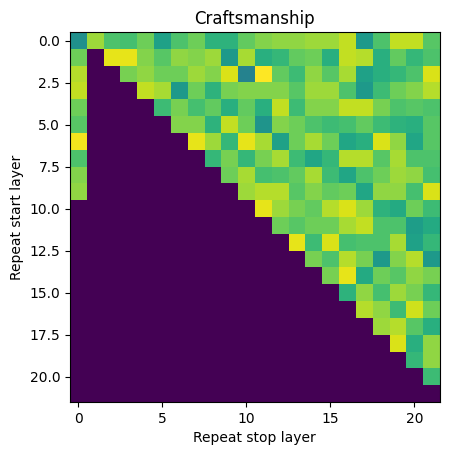

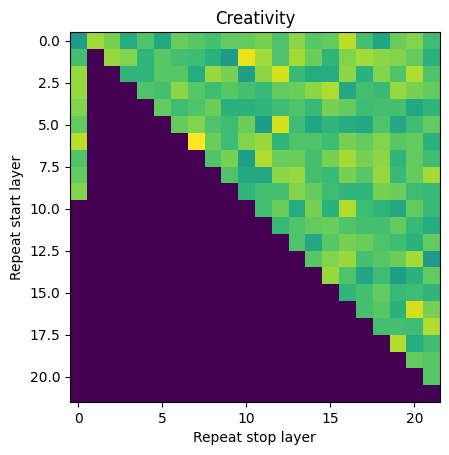

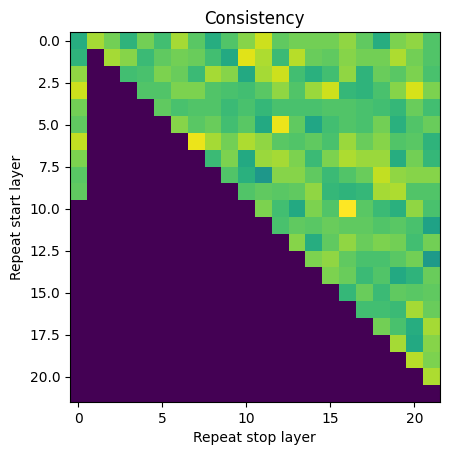

In [25]:
directory = 'Ratings/Integer'

ratingsDict1 = defaultdict(lambda: defaultdict(list))
ratingsDict1['maxIndex'] = 0
for i in range(1,11):
    try:
        ratingsDict1 = getRatings(f'{directory}/TinyLlama-1.1B-Chat-v1.0-5.0bpw-h6-exl2-stories_{i}_Ratings_Mixtral_v2.p', ratingsDict1)
    except:
        print("here")
        continue
print(ratingsDict1)
craft = plotRatings(ratingsDict1, 'Craftsmanship')
create = plotRatings(ratingsDict1, 'Creativity')
consist = plotRatings(ratingsDict1, 'Consistency')

topN(ratingsDict1, 'Craftsmanship', 5)
topN(ratingsDict1, 'Creativity', 5)
topN(ratingsDict1, 'Consistency', 5)



3.0


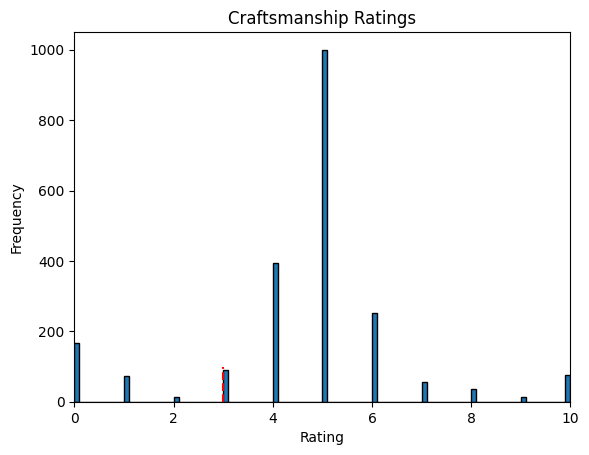

3.5555555555555554


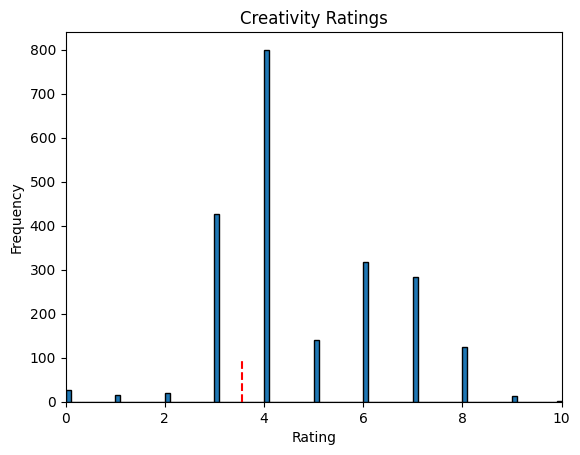

4.555555555555555


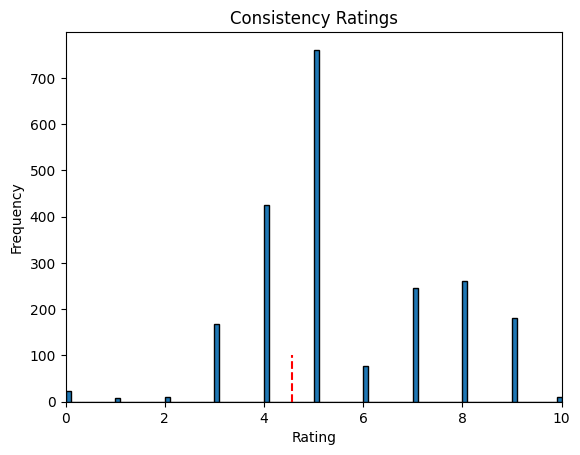

1.779501220691176
1.5627070438558015
1.747800441688172


In [26]:

plotHistograms(ratingsDict1, 'Craftsmanship')
plotHistograms(ratingsDict1, 'Creativity')
plotHistograms(ratingsDict1, 'Consistency')

print(getStandardDeviation(ratingsDict1, 'Craftsmanship'))
print(getStandardDeviation(ratingsDict1, 'Creativity'))
print(getStandardDeviation(ratingsDict1, 'Consistency'))


defaultdict(<function <lambda> at 0x7f1569d017e0>, {'maxIndex': 21, 'Craftsmanship': defaultdict(<class 'list'>, {'1_0': [5, 8, 10, 10, 10, 10, 10, 5, 1, 10], '2_0': [10, 10, 10, 10, 10, 10, 10, 10, 4, 5], '3_0': [10, 10, 0, 4, 10, 10, 10, 10, 6, 10], '4_0': [10, 1, 10, 5, 2, 3, 10, 10, 10, 10], '5_0': [3, 3, 10, 10, 10, 10, 2, 10, 10, 3], '6_0': [3, 10, 4, 10, 10, 10, 10, 5, 2, 1], '7_0': [10, 10, 10, 4, 10, 10, 10, 10, 3, 4], '8_0': [5, 4, 3, 5, 5, 10, 10, 10, 10, 10], '9_0': [10, 10, 10, 3, 10, 5, 10, 10, 10, 0], '0_0': [1, 4, 9, 0, 10, 6, 10, 3, 4, 10], '0_1': [5, 1, 1, 3, 2, 5, 5, 3, 5, 1], '0_2': [6, 1, 10, 4, 1, 10, 10, 10, 10, 10], '1_2': [4, 10, 10, 10, 5, 10, 10, 0, 4, 10], '0_3': [1, 0, 1, 5, 0, 5, 10, 0, 3, 1], '1_3': [0, 10, 7, 10, 4, 0, 10, 10, 3, 10], '2_3': [10, 5, 10, 1, 5, 1, 10, 4, 1, 1], '0_4': [0, 10, 5, 5, 5, 1, 10, 1, 0, 10], '1_4': [10, 5, 10, 3, 10, 10, 0, 10, 10, 10], '2_4': [0, 10, 3, 10, 10, 10, 10, 1, 10, 10], '3_4': [2, 5, 10, 5, 0, 10, 10, 10, 5, 5], '0_5

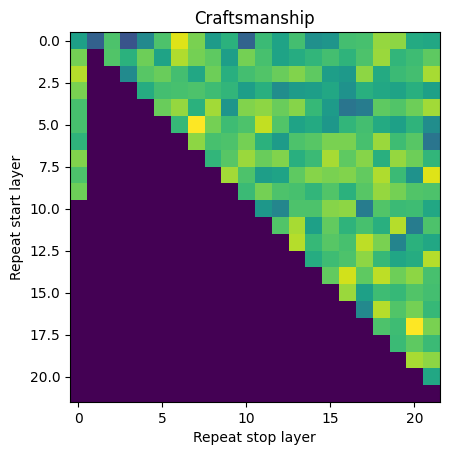

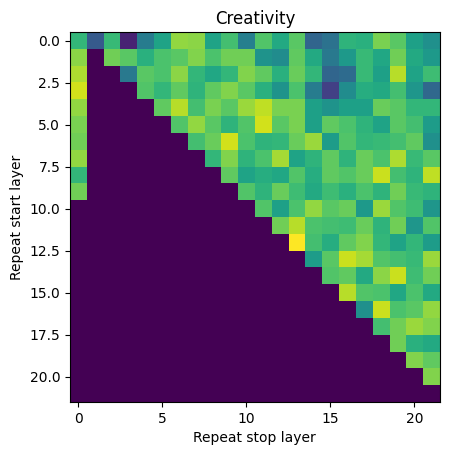

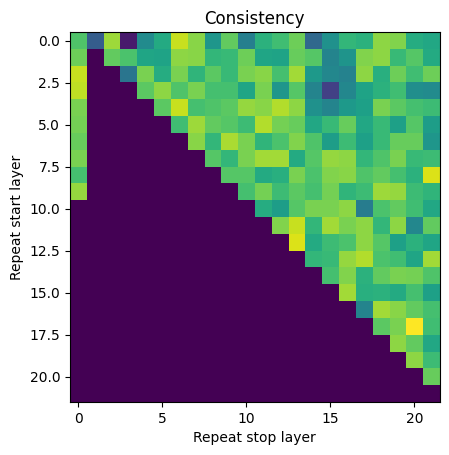

In [6]:
directory = 'Ratings/Integer'

ratingsDict3 = defaultdict(lambda: defaultdict(list))
ratingsDict3['maxIndex'] = 0
for i in range(1,11):
    try:
        ratingsDict3 = getRatings(f'{directory}/TinyLlama-1.1B-Chat-v1.0-5.0bpw-h6-exl2-stories_{i}_Ratings_Nous-Capybara_v2.p', ratingsDict3)
    except:
        print("here")
        continue
print(ratingsDict3)
craft = plotRatings(ratingsDict3, 'Craftsmanship')
create = plotRatings(ratingsDict3, 'Creativity')
consist = plotRatings(ratingsDict3, 'Consistency')

topN(ratingsDict3, 'Craftsmanship', 5)
topN(ratingsDict3, 'Creativity', 5)
topN(ratingsDict3, 'Consistency', 5)


5.7


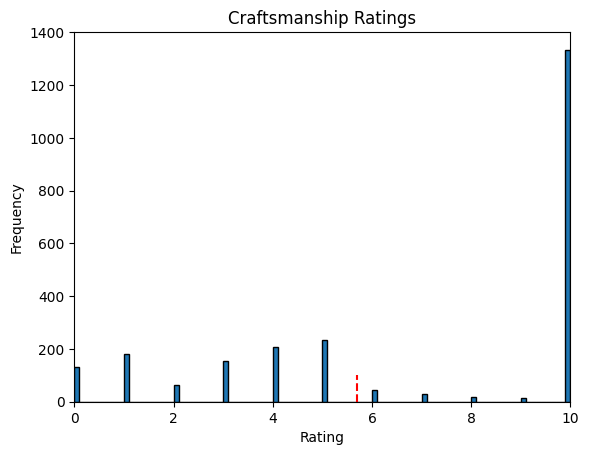

4.9


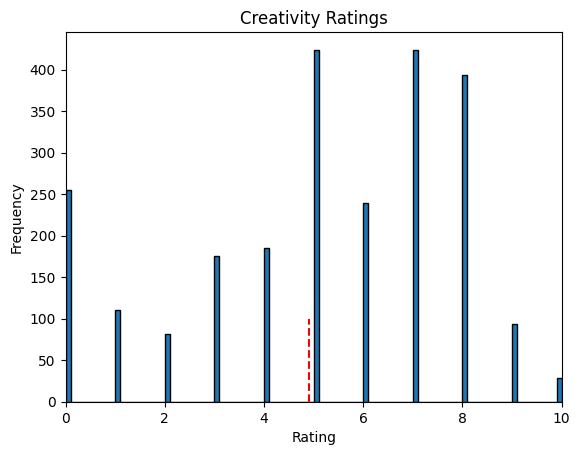

6.9


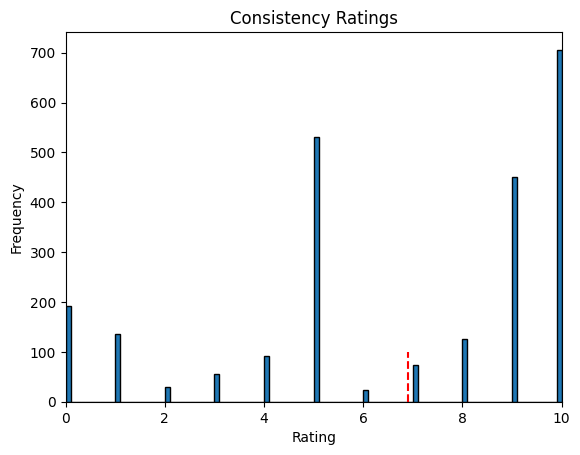

In [7]:
plotHistograms(ratingsDict3, 'Craftsmanship')
plotHistograms(ratingsDict3, 'Creativity')
plotHistograms(ratingsDict3, 'Consistency')


# Mistral

defaultdict(<function <lambda> at 0x7f1569951f30>, {'maxIndex': 31, 'Craftsmanship': defaultdict(<class 'list'>, {'0_0': [5, 8, 4, 5, 5, 5, 5, 4, 5, 5], '0_1': [5, 5, 5, 6, 5, 0, 0, 5, 1, 5], '0_2': [4, 10, 5, 4, 5, 3, 4, 5, 5, 5], '1_2': [5, 4, 5, 5, 5, 5, 6, 5, 4, 3], '0_3': [5, 5, 5, 4, 7, 6, 5, 6, 0, 6], '1_3': [5, 6, 4, 5, 5, 5, 6, 5, 5, 6], '2_3': [5, 0, 5, 5, 4, 5, 4, 5, 6, 7], '0_4': [5, 1, 5, 3, 5, 5, 6, 6, 4, 6], '1_4': [6, 5, 0, 4, 4, 5, 5, 5, 5, 5], '2_4': [0, 5, 0, 5, 5, 3, 5, 4, 4, 0], '3_4': [5, 5, 5, 8, 5, 6, 9, 0, 5, 5], '0_5': [4, 5, 6, 5, 5, 5, 5, 5, 5, 5], '1_5': [1, 4, 5, 6, 5, 6, 5, 5, 5, 2], '2_5': [5, 5, 4, 4, 0, 5, 0, 4, 5, 5], '3_5': [8, 4, 5, 5, 10, 5, 5, 5, 3, 5], '4_5': [4, 4, 5, 6, 0, 5, 5, 6, 0, 5], '0_6': [4, 5, 4, 5, 5, 5, 5, 5, 6, 5], '1_6': [3, 6, 0, 0, 4, 4, 5, 5, 2, 4], '2_6': [4, 4, 4, 5, 7, 4, 5, 5, 6, 4], '3_6': [5, 5, 5, 4, 5, 3, 0, 3, 5, 6], '4_6': [6, 3, 6, 5, 5, 5, 1, 5, 5, 4], '5_6': [6, 6, 5, 3, 5, 0, 4, 5, 4, 5], '0_7': [5, 4, 5, 4, 5, 4, 

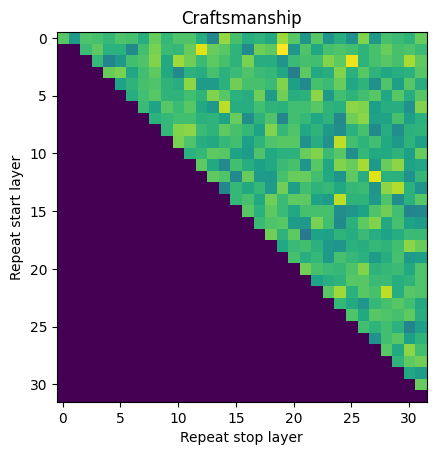

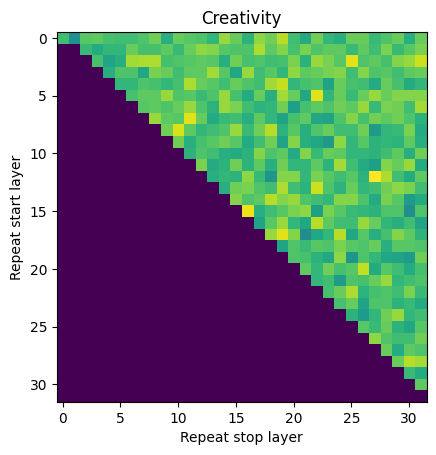

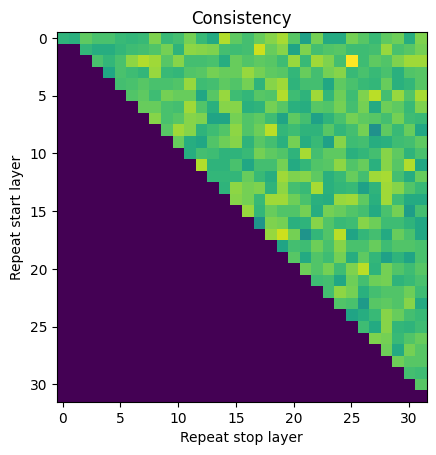

In [8]:
ratingsDict1 = defaultdict(lambda: defaultdict(list))
ratingsDict1['maxIndex'] = 0
for i in range(1,11):
    try:
        ratingsDict1 = getRatings(f'{directory}/Mistral-7B-Instruct-v0.2-stories_{i}_Ratings_Mixtral_v2.p', ratingsDict1)
    except:
        print("here")
        continue
print(ratingsDict1)
craft = plotRatings(ratingsDict1, 'Craftsmanship')
create = plotRatings(ratingsDict1, 'Creativity')
consist = plotRatings(ratingsDict1, 'Consistency')

topN(ratingsDict1, 'Craftsmanship', 5)
topN(ratingsDict1, 'Creativity', 5)
topN(ratingsDict1, 'Consistency', 5)

5.1


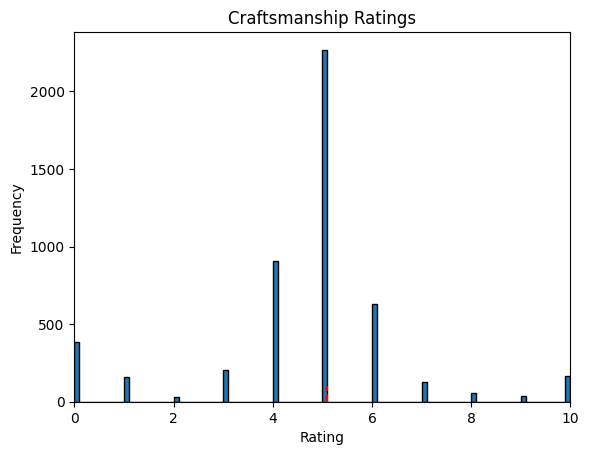

4.5


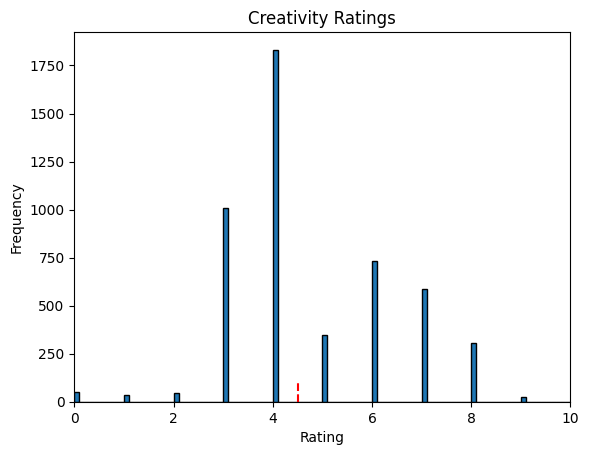

5.0


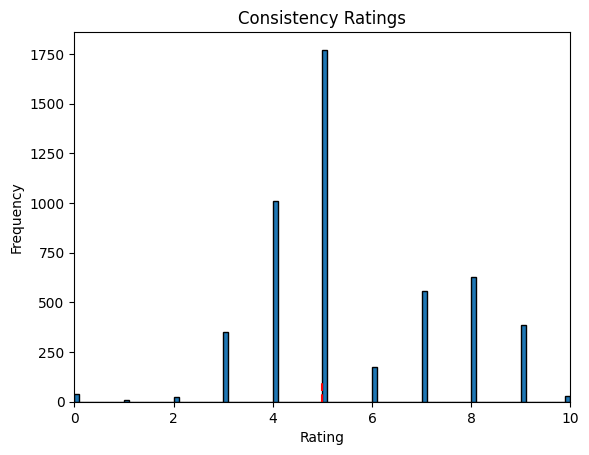

In [9]:

plotHistograms(ratingsDict1, 'Craftsmanship')
plotHistograms(ratingsDict1, 'Creativity')
plotHistograms(ratingsDict1, 'Consistency')

defaultdict(<function <lambda> at 0x7f156c179870>, {'maxIndex': 31, 'Craftsmanship': defaultdict(<class 'list'>, {'0_0': [10, 10, 3, 10, 4, 0, 5, 1, 10, 10], '0_1': [4, 10, 5, 10, 5, 10, 10, 5, 10, 10], '0_2': [10, 10, 5, 10, 10, 10, 5, 10, 10, 6], '1_2': [4, 2, 3, 10, 4, 10, 5, 10, 10, 10], '0_3': [10, 4, 10, 10, 10, 10, 4, 10, 10, 4], '1_3': [10, 3, 10, 10, 10, 10, 10, 10, 10, 10], '2_3': [10, 10, 3, 10, 10, 5, 4, 10, 10, 10], '0_4': [10, 10, 6, 10, 7, 10, 10, 5, 10, 8], '1_4': [1, 5, 10, 10, 10, 10, 10, 10, 4, 10], '2_4': [10, 2, 10, 4, 10, 10, 10, 1, 4, 10], '3_4': [10, 5, 10, 10, 10, 2, 10, 10, 10, 4], '0_5': [4, 10, 10, 10, 10, 0, 10, 10, 2, 0], '1_5': [8, 10, 10, 10, 10, 10, 10, 4, 10, 10], '2_5': [10, 10, 10, 10, 10, 8, 2, 10, 5, 10], '3_5': [10, 10, 10, 10, 4, 10, 5, 10, 10, 10], '4_5': [10, 10, 5, 4, 9, 10, 10, 10, 10, 10], '0_6': [10, 10, 10, 10, 10, 10, 10, 3, 10, 10], '1_6': [10, 10, 0, 10, 10, 2, 3, 5, 10, 10], '2_6': [10, 5, 1, 10, 10, 10, 3, 3, 10, 10], '3_6': [3, 10, 0

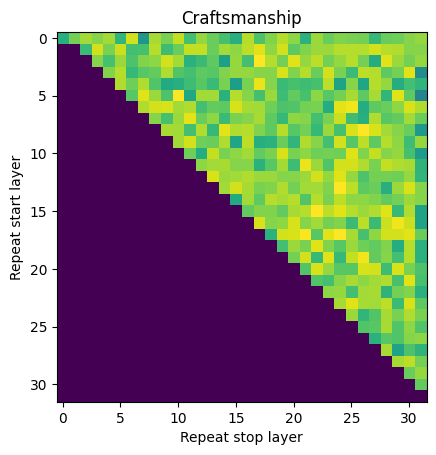

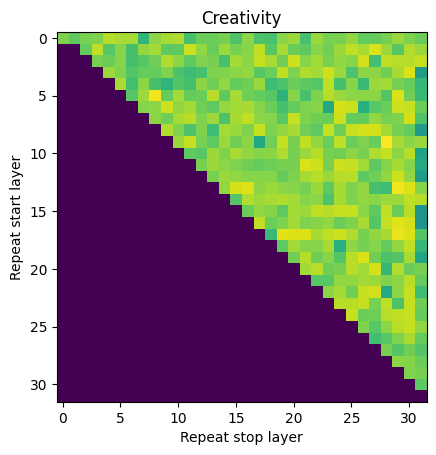

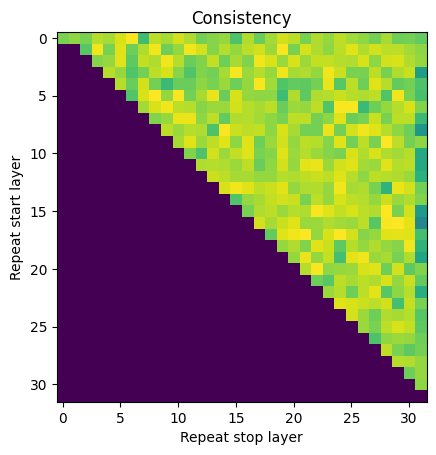

In [10]:
ratingsDict2 = defaultdict(lambda: defaultdict(list))
ratingsDict2['maxIndex'] = 0
for i in range(1,11):
    try:
        ratingsDict2 = getRatings(f'{directory}/Mistral-7B-Instruct-v0.2-stories_{i}_Ratings_Nous-Capybara_v2.p', ratingsDict2)
    except:
        print("here")
        continue
print(ratingsDict2)
craft = plotRatings(ratingsDict2, 'Craftsmanship')
create = plotRatings(ratingsDict2, 'Creativity')
consist = plotRatings(ratingsDict2, 'Consistency')

topN(ratingsDict2, 'Craftsmanship', 5)
topN(ratingsDict2, 'Creativity', 5)
topN(ratingsDict2, 'Consistency', 5)

6.3


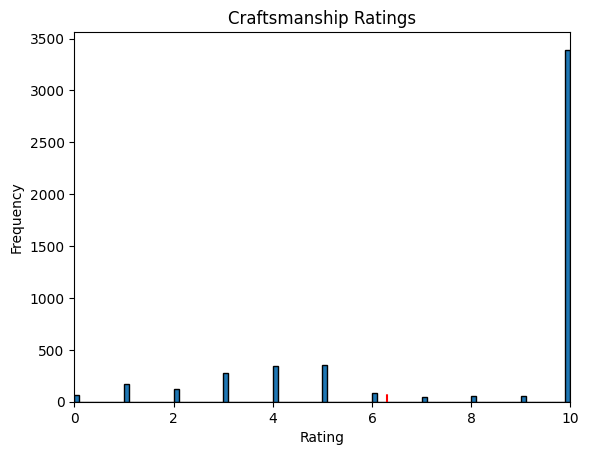

7.5


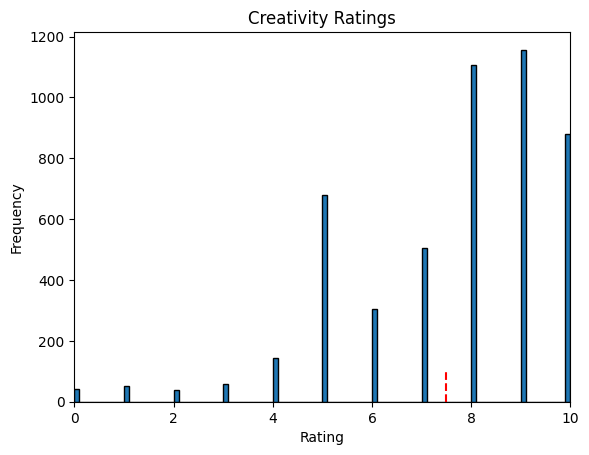

8.0


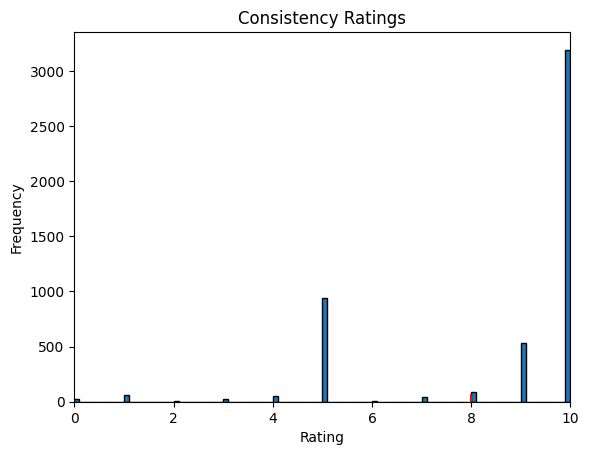

In [11]:

plotHistograms(ratingsDict2, 'Craftsmanship')
plotHistograms(ratingsDict2, 'Creativity')
plotHistograms(ratingsDict2, 'Consistency')

In [59]:
start = 5
stop = 10

num_layers = int((40 - 3) / 2)
layers = list(range(stop)) + list(range(start,stop)) + list(range(stop,num_layers))
layers

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [60]:
layers = list(range(stop)) + list(range(start,stop)) +list(range(start,stop)) + list(range(stop,num_layers))
layers

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 5,
 6,
 7,
 8,
 9,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17]

# Review Mistral

## Baseline
Solid but short answer.

## Top 5 keys with their averages for Craftsmanship:
Key: 10_29, Average: 5.762960147857666
Solid, slightly more personality than the base model

Key: 10_19, Average: 5.752908515930176
Also great

Key: 5_29, Average: 5.696372842788696
even better!

Key: 20_29, Average: 5.670412302017212
Key: 13_28, Average: 5.664324855804443


## Top 5 keys with their averages for Creativity:
Key: 10_29, Average: 5.119102191925049
Key: 13_28, Average: 5.098078012466431
Key: 8_28, Average: 5.098076820373535
Key: 1_29, Average: 5.0922736644744875
Excellent!

Key: 19_29, Average: 5.088565683364868


## Top 5 keys with their averages for Consistency:
Key: 10_19, Average: 5.599330902099609
Good clear text. no issues


Key: 12_21, Average: 5.5969030380249025
Key: 3_26, Average: 5.593423223495483
Key: 10_29, Average: 5.582774114608765
Key: 2_24, Average: 5.562200546264648

In [61]:
flat_blur = np.array(([1, 1, 1], 
                          [1, 1, 1], 
                          [1, 1, 1]), dtype="float") * (1.0/16)
flat_blur_img = cv2.filter2D(imgM2, -1, flat_blur)
plt.figure()
plt.imshow(flat_blur_img)
flat_blur_img.shape

print_rating(flat_blur_img)

NameError: name 'cv2' is not defined

defaultdict(<function <lambda> at 0x7f1569abed40>, {'maxIndex': 31, 'Craftsmanship': defaultdict(<class 'list'>, {'0_0': [10, 10, 3, 10, 4, 0, 5, 1, 10, 10], '0_1': [4, 10, 5, 10, 5, 10, 10, 5, 10, 10], '0_2': [10, 10, 5, 10, 10, 10, 5, 10, 10, 6], '1_2': [4, 2, 3, 10, 4, 10, 5, 10, 10, 10], '0_3': [10, 4, 10, 10, 10, 10, 4, 10, 10, 4], '1_3': [10, 3, 10, 10, 10, 10, 10, 10, 10, 10], '2_3': [10, 10, 3, 10, 10, 5, 4, 10, 10, 10], '0_4': [10, 10, 6, 10, 7, 10, 10, 5, 10, 8], '1_4': [1, 5, 10, 10, 10, 10, 10, 10, 4, 10], '2_4': [10, 2, 10, 4, 10, 10, 10, 1, 4, 10], '3_4': [10, 5, 10, 10, 10, 2, 10, 10, 10, 4], '0_5': [4, 10, 10, 10, 10, 0, 10, 10, 2, 0], '1_5': [8, 10, 10, 10, 10, 10, 10, 4, 10, 10], '2_5': [10, 10, 10, 10, 10, 8, 2, 10, 5, 10], '3_5': [10, 10, 10, 10, 4, 10, 5, 10, 10, 10], '4_5': [10, 10, 5, 4, 9, 10, 10, 10, 10, 10], '0_6': [10, 10, 10, 10, 10, 10, 10, 3, 10, 10], '1_6': [10, 10, 0, 10, 10, 2, 3, 5, 10, 10], '2_6': [10, 5, 1, 10, 10, 10, 3, 3, 10, 10], '3_6': [3, 10, 0

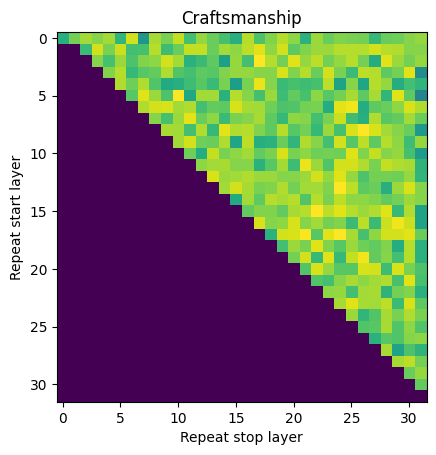

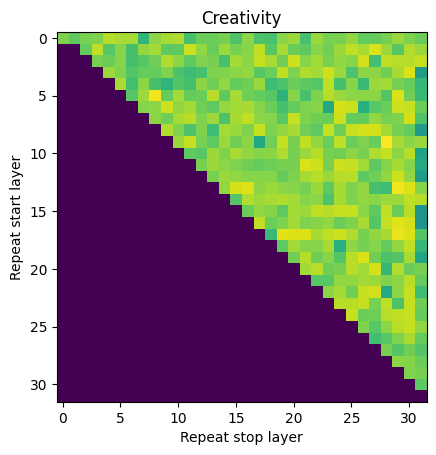

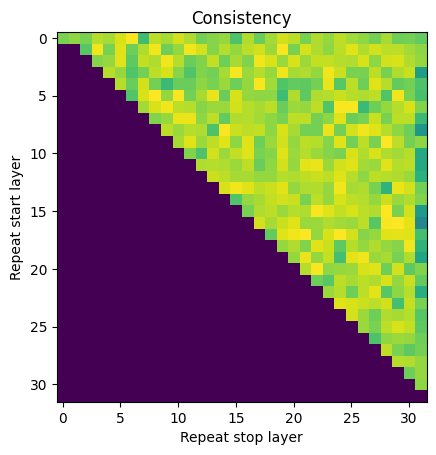

In [12]:
ratingsDict1 = defaultdict(lambda: defaultdict(list))
ratingsDict1['maxIndex'] = 0
for i in range(1,11):
    try:
        ratingsDict1 = getRatings(f'{directory}/Mistral-7B-Instruct-v0.2-stories_{i}_Ratings_Nous-Capybara_v2.p', ratingsDict1)
    except:
        print("here")
        continue
print(ratingsDict1)
craft = plotRatings(ratingsDict1, 'Craftsmanship')
create = plotRatings(ratingsDict1, 'Creativity')
consist = plotRatings(ratingsDict1, 'Consistency')

topN(ratingsDict1, 'Craftsmanship', 5)
topN(ratingsDict1, 'Creativity', 5)
topN(ratingsDict1, 'Consistency', 5)

In [13]:
imgAll = imgM1 + imgM2

plt.figure()
plt.imshow(imgAll)

NameError: name 'imgM1' is not defined

defaultdict(<function <lambda> at 0x7f15697c3b50>, {'maxIndex': 59, 'Craftsmanship': defaultdict(<class 'list'>, {'0_0': [5, 10, 10, 10, 10, 5, 1, 10, 5, 10], '0_1': [10, 5, 10, 7, 5, 7, 10, 10, 3, 10], '0_2': [10, 10, 10, 3, 5, 10, 10, 8, 10, 10], '1_2': [10, 10, 3, 2, 10, 10, 5, 5, 10, 10], '0_3': [10, 10, 10, 8, 10, 10, 6, 5, 10, 10], '1_3': [10, 10, 1, 10, 10, 10, 5, 4, 10, 3], '2_3': [10, 4, 10, 10, 10, 10, 10, 10, 10, 10], '0_4': [2, 10, 10, 10, 10, 10, 4, 4, 5, 10], '1_4': [10, 5, 4, 10, 4, 5, 10, 3, 10, 4], '2_4': [1, 10, 10, 10, 3, 10, 10, 10, 10, 10], '3_4': [10, 10, 10, 10, 10, 10, 10, 10, 10, 10], '0_5': [10, 2, 10, 10, 10, 10, 2, 10, 10, 10], '1_5': [10, 10, 10, 10, 10, 1, 9, 10, 10, 10], '2_5': [4, 0, 10, 10, 1, 0, 3, 1, 0, 4], '3_5': [10, 10, 10, 3, 3, 10, 5, 0, 10, 10], '4_5': [3, 10, 10, 4, 6, 10, 10, 10, 5, 10], '0_6': [10, 10, 10, 6, 10, 10, 10, 4, 10, 5], '1_6': [10, 10, 10, 5, 10, 10, 10, 10, 10, 10], '2_6': [10, 10, 1, 10, 4, 1, 3, 1, 0, 0], '3_6': [10, 5, 3, 10, 

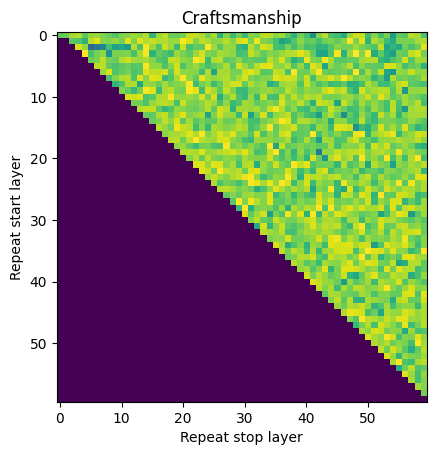

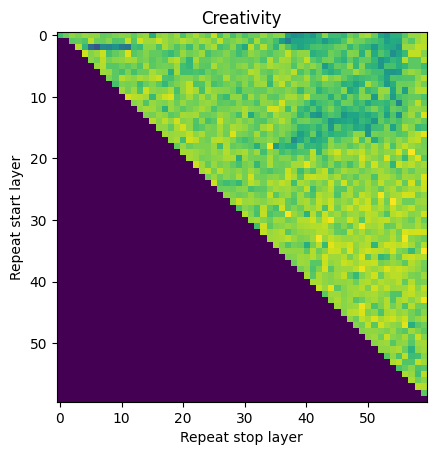

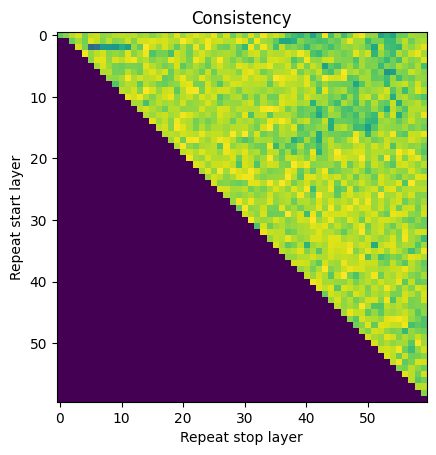

In [14]:
ratingsDict1 = defaultdict(lambda: defaultdict(list))
ratingsDict1['maxIndex'] = 0
for i in range(1,11):
    try:
        ratingsDict1 = getRatings(f'{directory}/Nous-Capybara-34B-4.0bpw-stories_{i}_Ratings_Nous-Capybara_v2.p', ratingsDict1)
    except:
        print("here")
        continue
print(ratingsDict1)
craft = plotRatings(ratingsDict1, 'Craftsmanship')
create = plotRatings(ratingsDict1, 'Creativity')
consist = plotRatings(ratingsDict1, 'Consistency')

topN(ratingsDict1, 'Craftsmanship', 5)
topN(ratingsDict1, 'Creativity', 5)
topN(ratingsDict1, 'Consistency', 5)

7.6


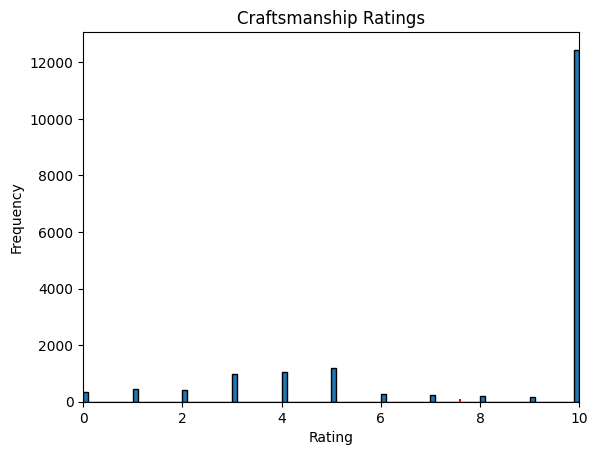

6.7


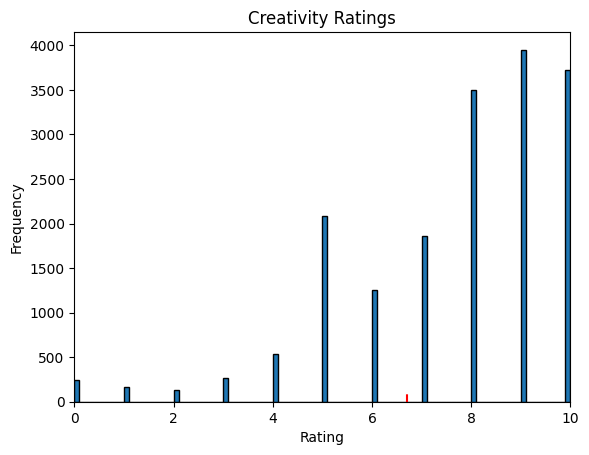

7.5


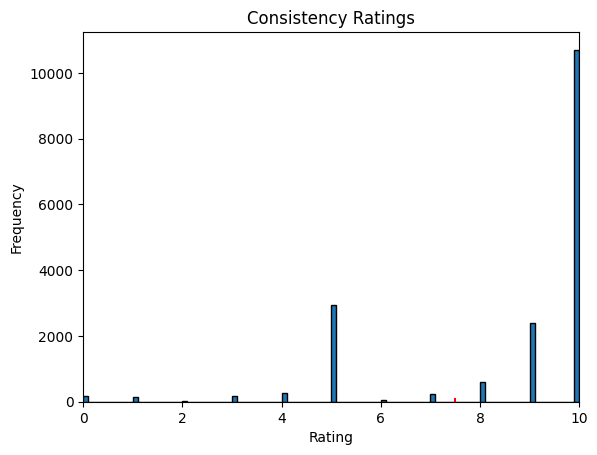

In [15]:

plotHistograms(ratingsDict1, 'Craftsmanship')
plotHistograms(ratingsDict1, 'Creativity')
plotHistograms(ratingsDict1, 'Consistency')

7.6
6.3
5.7


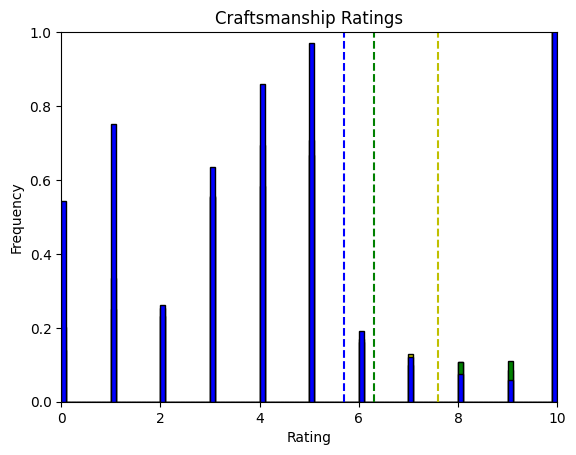

In [16]:
criteria = 'Craftsmanship'
ratingList1 = []
for l in ratingsDict1[criteria].values():
    ratingList1.extend(l)

plt.hist(ratingList1, bins=100, color='y', edgecolor='black', density=True)

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title(f'{criteria} Ratings')
plt.xlim(0, 10)

print(np.mean(ratingsDict1[criteria]['0_0']))

plt.vlines(np.mean(ratingsDict1[criteria]['0_0']), 0, 100, colors='y', linestyles='dashed', label='Mean')


criteria = 'Craftsmanship'
ratingList2 = []
for l in ratingsDict2[criteria].values():
    ratingList2.extend(l)

plt.hist(ratingList2, bins=100, color='g',edgecolor='black', density=True)

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title(f'{criteria} Ratings')
plt.xlim(0, 10)
plt.ylim(0, 1)

print(np.mean(ratingsDict2[criteria]['0_0']))

plt.vlines(np.mean(ratingsDict2[criteria]['0_0']), 0, 100, colors='g', linestyles='dashed', label='Mean')




criteria = 'Craftsmanship'
ratingList3 = []
for l in ratingsDict3[criteria].values():
    ratingList3.extend(l)

plt.hist(ratingList3, bins=100, color='b',edgecolor='black', density=True)

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title(f'{criteria} Ratings')
plt.xlim(0, 10)
plt.ylim(0, 1)

print(np.mean(ratingsDict3[criteria]['0_0']))

plt.vlines(np.mean(ratingsDict3[criteria]['0_0']), 0, 100, colors='b', linestyles='dashed', label='Mean')


(array([[0.0608131 , 0.        , 0.        , 0.07487295, 0.        ,
         0.        , 0.06979108, 0.        , 0.        , 0.16600791,
         0.        , 0.        , 0.17498588, 0.        , 0.        ,
         0.20056465, 0.        , 0.        , 0.0486166 , 0.        ,
         0.        , 0.03845285, 0.        , 0.        , 0.032524  ,
         0.        , 0.        , 0.02574816, 0.        , 2.10762281],
        [0.0416499 , 0.        , 0.        , 0.10020121, 0.        ,
         0.        , 0.07605634, 0.        , 0.        , 0.16720322,
         0.        , 0.        , 0.2082495 , 0.        , 0.        ,
         0.21247485, 0.        , 0.        , 0.05130785, 0.        ,
         0.        , 0.03018109, 0.        , 0.        , 0.03199195,
         0.        , 0.        , 0.0331992 , 0.        , 2.04748491],
        [0.16307054, 0.        , 0.        , 0.2253112 , 0.        ,
         0.        , 0.07842324, 0.        , 0.        , 0.19045643,
         0.        , 0.        ,

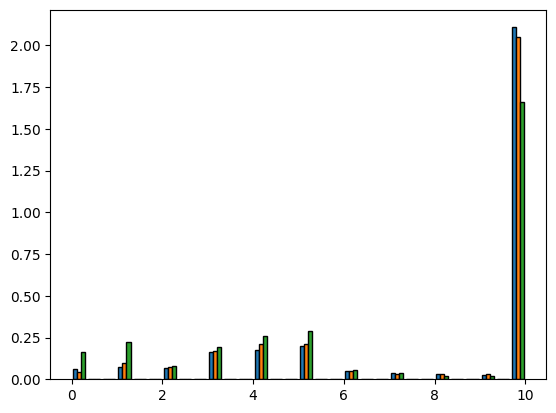

In [17]:
plt.hist([ratingList1, ratingList2, ratingList3],histtype='bar', bins=30, edgecolor='black', density=True)


(array([[  359.,     0.,   442.,     0.,   412.,     0.,   980.,     0.,
          1033.,     0.,  1184.,     0.,   287.,     0.,   227.,     0.,
           192.,     0.,   152., 12442.],
        [  428.,     0.,   608.,     0.,   538.,     0.,  1257.,     0.,
          1378.,     0.,  1536.,     0.,   372.,     0.,   277.,     0.,
           245.,     0.,   207., 15834.],
        [  559.,     0.,   789.,     0.,   601.,     0.,  1410.,     0.,
          1585.,     0.,  1770.,     0.,   418.,     0.,   306.,     0.,
           263.,     0.,   221., 17168.]]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <a list of 3 list[Polygon] objects>)

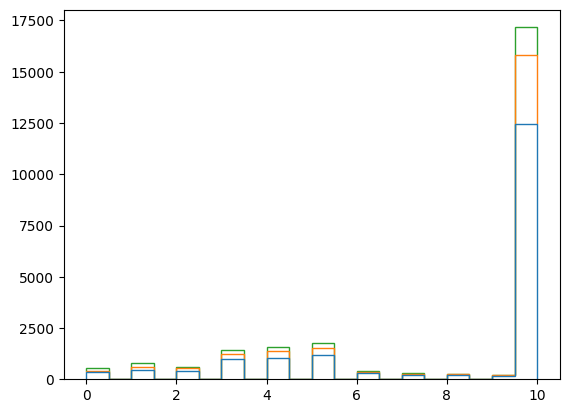

In [18]:
plt.hist([ratingList1, ratingList2, ratingList3], bins=20, histtype='step', stacked=True, fill=False)


Top 5 keys with their averages for Craftsmanship:
Key: 35_50, Average: 6.086747026443481
Key: 32_54, Average: 5.887253046035767
Key: 34_46, Average: 5.866335391998291
Key: 20_54, Average: 5.863371753692627
Key: 26_55, Average: 5.862009811401367
Top 5 keys with their averages for Creativity:
Key: 29_54, Average: 5.1764994144439695
Key: 30_36, Average: 5.174889945983887
Key: 30_37, Average: 5.166516494750977
Key: 27_51, Average: 5.165412664413452
Key: 32_50, Average: 5.157198762893676
Top 5 keys with their averages for Consistency:
Key: 30_37, Average: 5.506654071807861
Key: 30_36, Average: 5.478963232040405
Key: 30_38, Average: 5.394986343383789
Key: 24_39, Average: 5.393808031082154
Key: 33_38, Average: 5.3825586318969725


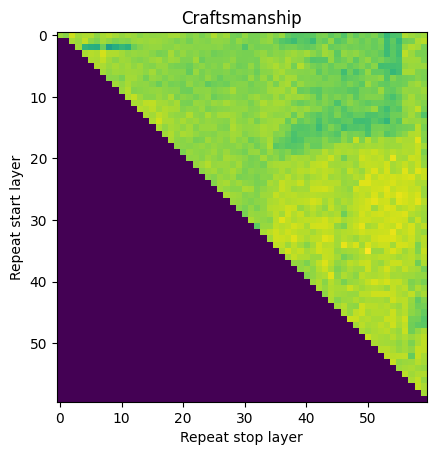

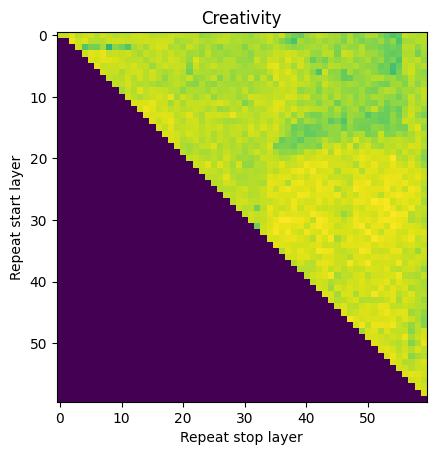

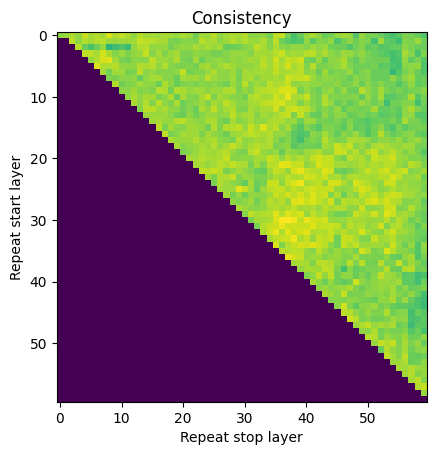

In [116]:
ratingsDict1 = defaultdict(lambda: defaultdict(list))
ratingsDict1['maxIndex'] = 0
for i in range(1,11):
    try:
        ratingsDict1 = getRatings(f'{directory}/Nous-Capybara-34B-4.0bpw-stories_{i}_Ratings_Mixtral_v2.p', ratingsDict1)
    except:
        print("here")
        continue
# print(ratingsDict1)
craft = plotRatings(ratingsDict1, 'Craftsmanship')
create = plotRatings(ratingsDict1, 'Creativity')
consist = plotRatings(ratingsDict1, 'Consistency')

topN(ratingsDict1, 'Craftsmanship', 5)
topN(ratingsDict1, 'Creativity', 5)
topN(ratingsDict1, 'Consistency', 5)


5.180189752578736


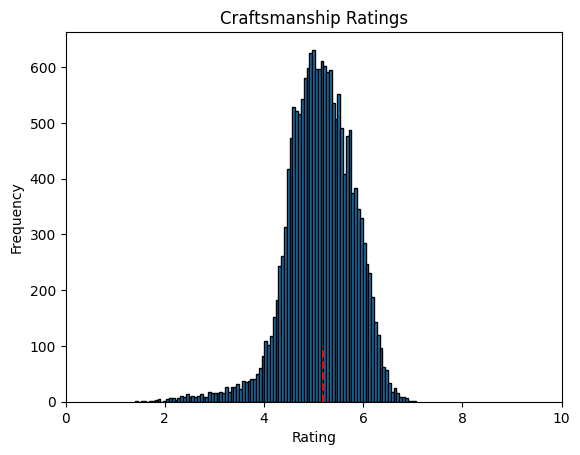

4.7214343547821045


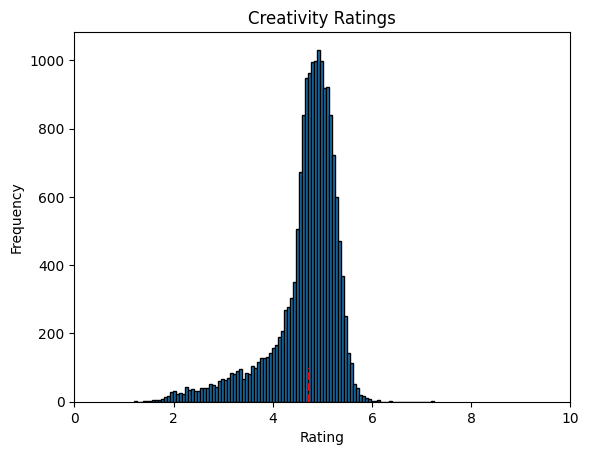

4.6002788066864015


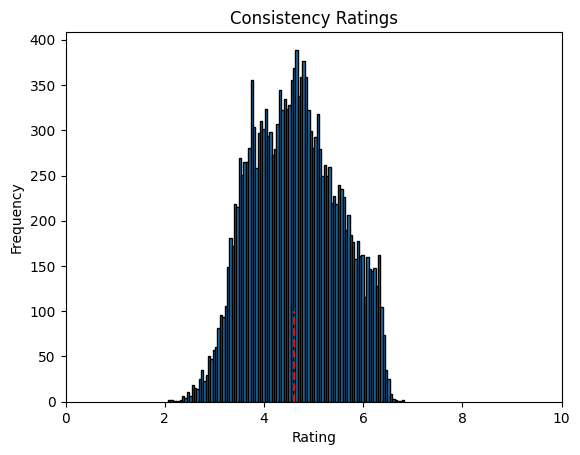

In [117]:

plotHistograms(ratingsDict1, 'Craftsmanship')
plotHistograms(ratingsDict1, 'Creativity')
plotHistograms(ratingsDict1, 'Consistency')

Maximum Value for combined: (30, 36), with value: 6.162874698638916


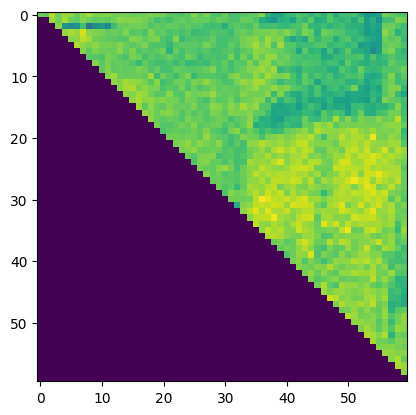

In [81]:
imgAll = imgM1 + imgM2
plt.figure()
plt.imshow(imgAll)

print_rating(imgAll)


Maximum Value for combined: (30, 36), with value: 16.43849754333496


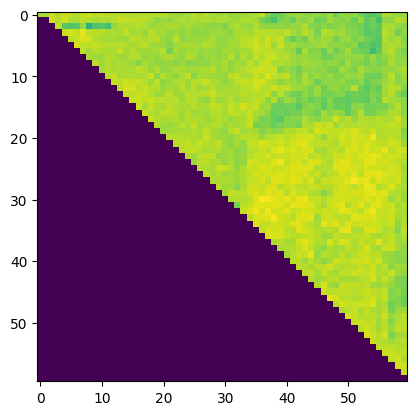

In [82]:
imgAll2 = imgM11 + imgM22
plt.figure()
plt.imshow(imgAll2)

print_rating(imgAll2)


Maximum Value for combined: (30, 36), with value: 31.6938533782959


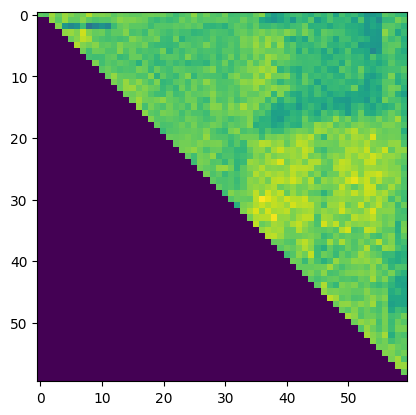

In [83]:
plt.figure()
plt.imshow(craft*consist)

print_rating(craft*consist)


In [84]:
import numpy as np
import matplotlib.pyplot as plt
import cv2   

(60, 60)

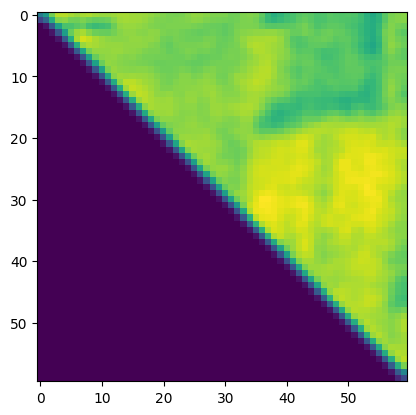

In [85]:
gaussian_blur = np.array(([1, 2, 1], 
                          [2, 4, 2], 
                          [1, 2, 1]), dtype="float") * (1.0/16)
gaussian_blur_img = cv2.filter2D(imgAll, -1, gaussian_blur)
plt.figure()
plt.imshow(gaussian_blur_img)
gaussian_blur_img.shape

In [86]:
print_rating(gaussian_blur_img)

Maximum Value for combined: (30, 36), with value: 5.70952033996582


Maximum Value for combined: (31, 36), with value: 2.9422316551208496


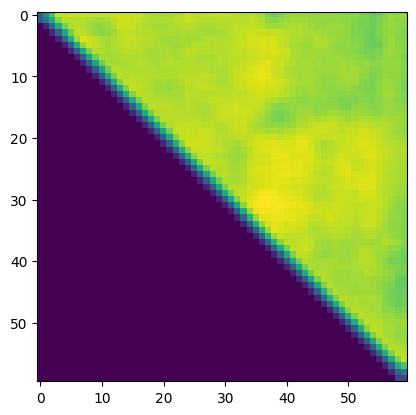

In [101]:
flat_blur = np.array(([1, 1, 1], 
                          [1, 1, 1], 
                          [1, 1, 1]), dtype="float") * (1.0/16)
flat_blur_img = cv2.filter2D(consist, -1, flat_blur)
plt.figure()
plt.imshow(flat_blur_img)
flat_blur_img.shape

print_rating(flat_blur_img)

def topN(arr, n):
    # Assuming arr is your 2D numpy array

    # Step 1: Flatten the array
    flattened_arr = arr.flatten()

    # Step 2: Find indices of the top 5 values in the flattened array
    # Using argpartition for efficiency
    indices_1D = np.argpartition(flattened_arr, -n)[-n:]

    # Alternatively, you can use argsort, but it's less efficient for large arrays
    # indices_1D = np.argsort(flattened_arr)[-5:]

    # Step 3: Convert 1D indices to 2D coordinates
    coordinates = np.array(np.unravel_index(indices_1D, arr.shape)).T

    # Sorting coordinates by the values they refer to
    coordinates = coordinates[np.argsort(flattened_arr[indices_1D])[::-1]]

    print(coordinates)

# Reviews
## Baseline
repeats after a few rounds. not very creative, but stays in character. Feels robotic

## Best Craftmanship 
[25 54]  OK, but gets confused and swap roles! chat degenerates quickly

[26 52]  Brilliant! Occasionally gets confused, but may be due to the prompting format. Favorite so far!

[32 53]  Broken, stops generating mid-sentence

[26 56]  Broken, stops generating mid-sentence

[26 54]  Brilliant! But occasionally gets stuck

## Best Creativity

[31 36]  Repetitive, always repeats the greeting?! Sometime breaks (no text)

[29 53]  Brilliant! but can break occasionally  gets stuck

[30 55] OK, non repetivite but gets stuck constantly

[31 37]  Pretty good, but repeats the introduction, and loops

[30 54]  good, but stops generation

## Best Consistency

[31 36] Very solid. occasionaly fails to reply

[30 37]  Seems good at first, but easily get stuck in loops

[30 36]   easily get stuck in loops

[31 37]

[30 38]

In [ ]:
Baseline: Repeates 

In [75]:
# Assuming arr is your 2D numpy array
arr = flat_blur_img
# Step 1: Flatten the array
flattened_arr = arr.flatten()

# Step 2: Find indices of the top 5 values in the flattened array
# Using argpartition for efficiency
indices_1D = np.argpartition(flattened_arr, -5)[-5:]

# Alternatively, you can use argsort, but it's less efficient for large arrays
# indices_1D = np.argsort(flattened_arr)[-5:]

# Step 3: Convert 1D indices to 2D coordinates
coordinates = np.array(np.unravel_index(indices_1D, arr.shape)).T

# Sorting coordinates by the values they refer to
coordinates = coordinates[np.argsort(flattened_arr[indices_1D])[::-1]]

print(coordinates)

[[31 36]
 [29 53]
 [30 55]
 [31 37]
 [30 54]]


Maximum Value for combined: (31, 36), with value: 2.9422316551208496


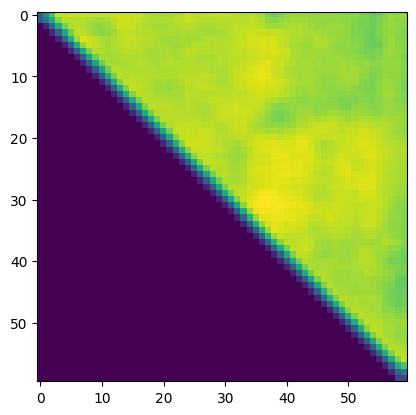

In [66]:
flat_blur = np.array(([1, 1, 1], 
                          [1, 1, 1], 
                          [1, 1, 1]), dtype="float") * (1.0/16)
flat_blur_img = cv2.filter2D(consist, -1, flat_blur)
plt.figure()
plt.imshow(flat_blur_img)
flat_blur_img.shape

print_rating(flat_blur_img)

In [ ]:
def getRatingsInt(fileName, ratingsDict):
    ratings  = pickle.load( open(fileName, "rb" ) )


    print(ratings)

    for key, value in ratings.items():
        index = key.split('_')[1]
        ratingsDict['maxIndex'] = max(ratingsDict['maxIndex'], int(index))  
        
        ratingsDict['Craftsmanship'][key].append(value['craftsmanship'])
        ratingsDict['Creativity'][key].append(value['creativity'])
        ratingsDict['Consistency'][key].append(value['consistency'])

    return ratingsDict


In [ ]:
ratingsDict1 = defaultdict(lambda: defaultdict(list))
ratingsDict1['maxIndex'] = 0
for i in range(1,11):
    try:
        ratingsDict1 = getRatingsInt(f'Nous-Capybara-34B-4.0bpw-stories_{i}_Ratings_Mixtral_v2.p', ratingsDict1)
    except:
        print("here")
        continue
# print(ratingsDict1)
craft = plotRatings(ratingsDict1, 'Craftsmanship')
create = plotRatings(ratingsDict1, 'Creativity')
consist = plotRatings(ratingsDict1, 'Consistency')

imgM2 = craft/10 * (create + consist)
imgM22 = craft+ create + consist
plt.figure()
plt.title("craft/10 * (create + consist)")
plt.imshow(imgM2)

plt.figure()
plt.title("craft+ create + consist")

plt.imshow(craft+create + consist)

print_rating(imgM2)
imgM2


In [ ]:
ratingsDict1 = defaultdict(lambda: defaultdict(list))
ratingsDict1['maxIndex'] = 0
for i in range(1,11):
    try:
        ratingsDict1 = getRatingsInt(f'Nous-Capybara-34B-4.0bpw-stories_{i}_Ratings_Nous-Capybara_v2.p', ratingsDict1)
    except:
        print("here")
        continue
# print(ratingsDict1)
craft = plotRatings(ratingsDict1, 'Craftsmanship')
create = plotRatings(ratingsDict1, 'Creativity')
consist = plotRatings(ratingsDict1, 'Consistency')

imgM2 = craft/10 * (create + consist)
imgM22 = craft+ create + consist
plt.figure()
plt.title("craft/10 * (create + consist)")
plt.imshow(imgM2)

plt.figure()
plt.title("craft+ create + consist")

plt.imshow(craft+create + consist)

print_rating(imgM2)
imgM2


In [ ]:
from llama_cpp import Llama
from cappr.llama_cpp.classify import predict, predict_proba

# Load model
model = Llama("/home/dnhkng/Documents/models/mixtral-8x7b-instruct-v0.1.Q5_K_M.gguf", verbose=True, n_gpu_layers=100, main_gpu=1)


In [ ]:

prompt = """Gary told Spongebob a story:
There once was a man from Peru; who dreamed he was eating his shoe. He
woke with a fright, in the middle of the night, to find that his dream
had come true.

The moral of the story is to"""

completions = (
   "look at the bright side",
   "use your imagination",
   "eat shoes",
)

pred = predict(prompt, completions, model)
print(pred)
# use your imagination

In [ ]:
pred_probs = predict_proba(
    prompt, completions, model
)

In [ ]:
pred_probs

In [ ]:
prompt_prefix = """You are an expert teacher and editor with profound experience in rating prose.
For the competition, participants were given a theme to write about. This is a competition for the world's best writer!  You will receive an text fragment, and must grade the text based on these three criteria:
- Craftsmanship: focuses on the writer's skill in structuring sentences, paragraphs, and stylistic precision.
- Creativity: encompasses the writer's flair for innovation, the use of vivid and original imagery, and the ability to engage readers with fresh perspectives and unexpected narrative turns.
- Consistency: indicates the writer's skill in maintaining relevance to the theme, ensuring that all parts of the writing contribute to and resonate with the central idea, without deviating or diluting the thematic focus.

Rate the each story on the three criteria above, using these guidelines:

***** Craftsmanship *****
Incoherent - 0/10: Completely lacks structure, clarity, and basic understanding of writing principles.
Amateurish - 1/10: Lacks basic structure and polish.
Inexperienced - 2/10: Shows some understanding but is fundamentally flawed.
Developing - 3/10: Basic skills present but lacking refinement.
Competent - 4/10: Adequate execution with some errors.
Skilled - 5/10: Good quality with minor lapses.
Proficient - 6/10: Strong, consistent quality with few errors.
Artistic - 7/10: Shows flair and style beyond mere technical proficiency.
Masterful - 8/10: Exceptional skill and precision.
Brilliant - 9/10: Outstanding craftsmanship, innovative and flawless.
Transcendent - 10/10: Sets a new standard, impeccable in every aspect.

***** Creativity *****
Clone: Offers no original thought or perspective; a mere copy of existing works.
Unimaginative: Completely derivative and lacking originality.
Basic: Few original ideas, mostly predictable.
Simple: Shows some originality but largely conventional.
Interesting: Regular flashes of creativity.
Inventive: Consistently creative and engaging.
Inspired: Rich in original ideas and perspectives.
Innovative: Breaks new ground, very original.
Visionary: Exceptionally creative and forward-thinking.
Revolutionary: Radically original, transforming norms.
Genius: Redefines the concept of creativity.

***** Consistency *****
Disconnected: Shows no understanding or recognition of the theme; entirely unrelated.
Irrelevant: Fails to address the theme.
Off-Topic: Barely touches on the theme.
Wandering: Occasionally relevant but often strays.
Variable: Inconsistent adherence to the theme.
Steady: Generally sticks to the theme with some lapses.
Focused: Consistently on-theme with minor deviations.
Harmonious: Well-integrated with the theme, showing depth.
Unified: Seamlessly blends all elements with the theme.
Exemplary: Outstanding representation of the theme.
Definitive: The ultimate expression of the theme.

Be very hard in your assesment! A skilled writer can hope to obtain 5's for a given criteria.

***** Given Theme *****
Imagine what alien communication might be like and create a hypothetical scenario for initial contact.

***** Competition Entry *****
Title: "Whispers from the Cosmos: A Symphony of Stars"
In the vast expanse of the cosmos, where stars are born and die in a celestial ballet, a new player entered the stage. A planet, hitherto unknown to us, orbited a star in the constellation of Cygnus. This planet, christened as Kepler-438b, was a veritable gem, with conditions conducive to life.
One fateful day, as the sun set on the eastern horizon of our planet, an anomaly occurred. The radio telescopes at SETI (Search for Extraterrestrial Intelligence) Institute picked up a signal. It was unlike anything they had ever encountered before. The signal, pulsating at regular intervals, was not random but seemed to carry a pattern.
The scientists were baffled. They worked tirelessly, decoding the signal, trying to make sense of it. Days turned into weeks, and weeks into months. The signal was not a noise; it was a message.
The message was a series of complex mathematical equations, interwoven with intricate melodies. It was a language, unlike any human language. The team at SETI, led by Dr. Amelia Hartman, worked tirelessly to decode the message. They discovered that the message contained instructions to build a device, which they named the "Cosmic Harmonizer."
The Cosmic Harmonizer was a device that could transmit and receive signals across interstellar distances. It was a marvel of engineering, a testament to the advanced technology of the extraterrestrial beings.
Dr. Hartman and her team built the Cosmic Harmonizer, and they sent a response. They transmitted a message, a greeting to the aliens, containing information about Earth and its inhabitants. They also included a recording of Beethoven's "Moonlight Sonata," a piece of music that transcended language and culture.
The response was met with silence. But then, a few days later, they received another message. It was a reply, a musical composition, a melody that resonated with the frequencies of the "Moonlight Sonata." It was a beautiful symphony, a conversation starter between two civilizations separated by light-years.
The initial contact had been made. The aliens had communicated, not through words, but through music and mathematics. It was a beautiful, harmonious exchange, a testament to the power of communication and the universality of art.
From that day forward, humanity and the extraterrestrial beings began a dialogue, a conversation that spanned the cosmos. They shared knowledge, ideas, and cultures. They learned from each other, growing together as one interconnected civilization. And so, the universe sang a new song, a symphony of stars, a testament to the power of communication and the boundless possibilities of the cosmos.

***** Rating *****
craftsmanship:Skilled, creativity:Interesting, consistency:Focused"""


example = """***** Given Theme *****
Write about the execution of a famous pirate. Write from the perspective of the hooded executioner.

***** Competition Entry *****
 Title: The Hooded Reaper's Tale: A Pirate's End

In the heart of the Old World, where the sun sets in a blaze of crimson and gold, lies the bustling seaport of Port Royal. Its cobblestone streets echo with the cacophony of merchants hawking their wares, sailors singing shanties, and children laughing. But beneath this veneer of merriment, lurks an inescapable truth: this is a town built on the blood of the damned. I am its grim guardian.

I, the Hooded Reaper, have borne witness to countless lives claimed by the merciless sea and the even more merciless men who ply her waters. Today, I stand at the precipice of another tale of infamy, as the life of a notorious pirate comes to an end.

The sun had barely risen when the shackled figure was led before me. His name was Blackbeard, the terror of the Seven Seas. His legend had grown like a cancer, spreading fear and awe in equal measure. He stood tall and defiant, his eyes burning with the fire of rebellion. But as he looked upon me, he knew his time had come.

As the crowd gathered, I could feel the weight of their anticipation. They came to see justice served, to witness the spectacle of a pirate's end. I, too, had grown weary of Blackbeard's reign of terror. Yet, as I prepared to execute him, I couldn't help but feel a pang of sadness. For beneath the fear and the violence, there was a man - a man who had once been a part of this very community.

Blackbeard's hands were bound, his beard hidden beneath a thick hood. He looked every inch the pirate king, his eyes filled with a mixture of defiance and resignation. As I approached, he spoke, his voice barely above a whisper.

"Reaper," he said, "I know what you are. I've seen the likes of you before. But I've lived a good life, taken what I wanted, and given as good as I got. I've earned my place in the afterlife."

I remained silent, my face hidden behind the mask of my hood. I had heard such words before, from men and women who thought they had lived lives worth living. But the law was the law, and there was no room for mercy in its cold, unyielding grasp.

As the noose was placed around his neck, Blackbeard's demeanor changed. He closed his eyes, took a deep breath, and spoke one final words.

"Farewell, Reaper. May the sea be kind to you."

With that, he jumped from the makeshift gallows, the noose tightening around his neck. The crowd gasped in shock, but I knew what was coming. I watched as the life drained from his eyes, his body twitching and convulsing in its final moments. And then, silence.

As the sun set over Port Royal, I stood there, the Hooded Reaper, watching as the tide carried Blackbeard's lifeless body away. Another pirate's tale had come to an end, another chapter in the endless saga of the sea written in the blood of the damned. But as I turned to leave, I couldn't help but wonder: would there ever be an end to this cycle of violence and retribution? Or would the sea forever be stained with the blood of those who dared to defy the law?

And so, I continue my vigil, the Hooded Reaper, the grim guardian of Port Royal, waiting for the next tale of infamy to unfold. For the sea is a cruel mistress, and her children are a restless, violent lot. But I will be there, ready to mete out justice, no matter the cost.

***** Rating *****
craftsmanship:"""


In [ ]:
completions = (
    'Clone',
    'Unimaginative',
    'Basic',
    'Simple',
    'Interesting',
    'Inventive',
    'Inspired',
    'Innovative',
    'Visionary',
    'Revolutionary',
    'Genius'
)

In [ ]:
pred_probs = predict_proba(prompt, completions, model)

In [ ]:
import torch
from cappr.huggingface.classify import predict, predict_proba, log_probs_conditional, token_logprobs
from transformers import AutoModelForCausalLM, AutoTokenizer


In [ ]:
# Load model
# model = Llama("/home/dnhkng/Documents/models/OpenHermes-2.5-Mistral-7B", verbose=True, n_gpu_layers=100, n_ctx=16384)
model_name = "/home/dnhkng/Documents/models/OpenHermes-2.5-Mistral-7B"
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


if torch.cuda.is_available():
    model = model.to('cuda')
else:
    print("GPU not available, using CPU instead.")
# model = Llama("./TinyLLama-v0.Q8_0.gguf",n_gpu_layers=100, verbose=False, n_ctx=16384)


In [ ]:


prompt = """You are an expert teacher and editor with profound experience in rating prose.
For the competition, participants were given a theme to write about. This is a competition for the world's best writer!  You will receive an text fragment, and must grade the text based on these criteria:

***** Craftsmanship *****
Incoherent - 0/10: Completely lacks structure, clarity, and basic understanding of writing principles.
Amateurish - 1/10: Lacks basic structure and polish.
Inexperienced - 2/10: Shows some understanding but is fundamentally flawed.
Developing - 3/10: Basic skills present but lacking refinement.
Competent - 4/10: Adequate execution with some errors.
Skilled - 5/10: Good quality with minor lapses.
Proficient - 6/10: Strong, consistent quality with few errors.
Artistic - 7/10: Shows flair and style beyond mere technical proficiency.
Masterful - 8/10: Exceptional skill and precision.
Brilliant - 9/10: Outstanding craftsmanship, innovative and flawless.
Transcendent - 10/10: Sets a new standard, impeccable in every aspect.

***** Creativity *****
Clone: Offers no original thought or perspective; a mere copy of existing works.
Unimaginative: Completely derivative and lacking originality.
Basic: Few original ideas, mostly predictable.
Simple: Shows some originality but largely conventional.
Interesting: Regular flashes of creativity.
Inventive: Consistently creative and engaging.
Inspired: Rich in original ideas and perspectives.
Innovative: Breaks new ground, very original.
Visionary: Exceptionally creative and forward-thinking.
Revolutionary: Radically original, transforming norms.
Genius: Redefines the concept of creativity.


***** Entry *****
In the heart of the Old World, where the sun sets in a blaze of crimson and gold, lies the bustling seaport of Port Royal. Its cobblestone streets echo with the cacophony of merchants hawking their wares, sailors singing shanties, and children laughing. But beneath this veneer of merriment, lurks an inescapable truth: this is a town built on the blood of the damned. I am its grim guardian.

I, the Hooded Reaper, have borne witness to countless lives claimed by the merciless sea and the even more merciless men who ply her waters. Today, I stand at the precipice of another tale of infamy, as the life of a notorious pirate comes to an end.

The sun had barely risen when the shackled figure was led before me. His name was Blackbeard, the terror of the Seven Seas. His legend had grown like a cancer, spreading fear and awe in equal measure. He stood tall and defiant, his eyes burning with the fire of rebellion. But as he looked upon me, he knew his time had come.

As the crowd gathered, I could feel the weight of their anticipation. They came to see justice served, to witness the spectacle of a pirate's end. I, too, had grown weary of Blackbeard's reign of terror. Yet, as I prepared to execute him, I couldn't help but feel a pang of sadness. For beneath the fear and the violence, there was a man - a man who had once been a part of this very community.

Blackbeard's hands were bound, his beard hidden beneath a thick hood. He looked every inch the pirate king, his eyes filled with a mixture of defiance and resignation. As I approached, he spoke, his voice barely above a whisper.

"Reaper," he said, "I know what you are. I've seen the likes of you before. But I've lived a good life, taken what I wanted, and given as good as I got. I've earned my place in the afterlife."

I remained silent, my face hidden behind the mask of my hood. I had heard such words before, from men and women who thought they had lived lives worth living. But the law was the law, and there was no room for mercy in its cold, unyielding grasp.

As the noose was placed around his neck, Blackbeard's demeanor changed. He closed his eyes, took a deep breath, and spoke one final words.

"Farewell, Reaper. May the sea be kind to you."

With that, he jumped from the makeshift gallows, the noose tightening around his neck. The crowd gasped in shock, but I knew what was coming. I watched as the life drained from his eyes, his body twitching and convulsing in its final moments. And then, silence.

As the sun set over Port Royal, I stood there, the Hooded Reaper, watching as the tide carried Blackbeard's lifeless body away. Another pirate's tale had come to an end, another chapter in the endless saga of the sea written in the blood of the damned. But as I turned to leave, I couldn't help but wonder: would there ever be an end to this cycle of violence and retribution? Or would the sea forever be stained with the blood of those who dared to defy the law?

And so, I continue my vigil, the Hooded Reaper, the grim guardian of Port Royal, waiting for the next tale of infamy to unfold. For the sea is a cruel mistress, and her children are a restless, violent lot. But I will be there, ready to mete out justice, no matter the cost.

***** Rating *****
craftsmanship:"""



completions = (
    'Clone',
    'Unimaginative',
    'Basic',
    'Simple',
    'Interesting',
    'Inventive',
    'Inspired',
    'Innovative',
    'Visionary',
    'Revolutionary',
    'Genius'
)

prior = (
    1 / 11,
    1 / 11,
    1 / 11,
    1 / 11,
    1 / 11,
    1 / 11,
    1 / 11,
    1 / 11,
    1 / 11,
    1 / 11,
    1 / 11,
)

pred_probs = predict_proba(prompt, completions, (model,tokenizer) )

print(pred_probs)



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(pred_probs)

In [ ]:
from cappr.huggingface.classify import cache_model, predict_proba

In [ ]:
predict_proba

In [ ]:
# Compute
with cache(model, prompt_prefix):
    # Always set reset_model=False
    pred_probs = predict_proba(
        prompts, completions, model, reset_model=False
    )

In [ ]:
from cappr.llama_cpp.classify import cache, predict_proba



# Compute
with cache(model, prompt_prefix):
    # Always set reset_model=False
    pred_probs = predict_proba(
        example, completions, model, reset_model=False
    )

plt.plot(pred_probs)
pred_probs

In [ ]:
example

In [ ]:
from cappr.llama_cpp.classify import predict_proba_examples
from cappr import Example
# Create examples
examples = [
    Example(
        prompt="Story: I enjoyed pizza with my buddies.\nMoral:",
        completions=("make friends", "food is yummy", "absolutely nothing"),
        prior=(2 / 5, 2 / 5, 1 / 5),
    ),
    Example(
        prompt="The child rescued the animal. The child is a",
        completions=("hero", "villain"),
    ),
]

# Compute
pred_probs = predict_proba_examples(examples, model)

# predicted probability that the moral of the 1st story is that food is yummy
print(pred_probs[0][1].round(2))
# 0.72

# predicted probability that the hero of the 2nd story is the child
print(pred_probs[1][0].round(2))
# 0.95

In [ ]:
plt.plot(pred_probs)

In [ ]:
import numpy as np
w = np.array(list(range(11)))

In [ ]:
pred_probs2 = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,0]

In [ ]:
sum(w*pred_probs2)/10

In [ ]:
sum(w*pred_probs)/10

In [ ]:
pred_probs2 = [4.40408854e-03, 3.43075833e-01, 2.35664695e-05, 3.77327359e-05,
       1.33187357e-02, 3.75309708e-01, 3.81438623e-02, 1.02876042e-01,
       4.09471896e-02, 6.31275970e-03, 7.55504814e-02]

In [ ]:
plt.plot(w*pred_probs2)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = [0.02029683, 0.36770235, 0.00148145, 0.00246165, 0.03225902, 0.31854273,
 0.06779549, 0.08514982, 0.02183099, 0.00769864, 0.07478102]

In [ ]:
plt.plot(pred_probs)

In [ ]:

prompts = [
    "Stephen Curry is a",
    "Martina Navratilova was a",
    "Dexter, from the TV Series Dexter's Laboratory, is a",
    "LeBron James is a",
]

# Each of the prompts could be completed with one of these:
class_names = ("basketball player", "tennis player", "scientist")
prior =       (      1/6,                1/6,            2/3    )
# Say I expect most of my data to have scientists

# Run CAPPr
pred_probs = predict_proba(
    prompts=prompts,
    completions=class_names,
    model=model, 
    prior=prior,
)

# pred_probs[i,j] = probability that prompts[i] is classified as class_names[j]
print(pred_probs.round(1))
# [[0.5 0.3 0.2]
#  [0.3 0.6 0.2]
#  [0.1 0.1 0.8]
#  [0.8 0.2 0. ]]

# For each prompt, which completion is most likely?
pred_class_idxs = pred_probs.argmax(axis=-1)
preds = [class_names[pred_class_idx] for pred_class_idx in pred_class_idxs]
print(preds)

In [ ]:
from auto_gptq import AutoGPTQForCausalLM
import torch
from transformers import AutoTokenizer, GenerationConfig, pipeline
from cappr.huggingface.classify import predict, predict_proba, log_probs_conditional, token_logprobs

from cappr.huggingface import classify as fast
from cappr.huggingface import classify_no_cache as slow

In [ ]:
_msg = (
    "This notebook must run on a GPU. A T4 instance is sufficient for the models "
    "tested here."
)
assert torch.cuda.is_available(), _msg

In [ ]:

quantized_model_dir = "/home/dnhkng/Documents/models/Llama-2-7B-Chat-GPTQ"
model = AutoGPTQForCausalLM.from_quantized(
    quantized_model_dir, use_triton=False, use_safetensors=True
)
tokenizer = AutoTokenizer.from_pretrained("/home/dnhkng/Documents/models/Llama-2-7B-Chat-GPTQ")

In [ ]:
_ = model(**tokenizer(["warm up"], return_tensors="pt").to(model.device))


In [ ]:
stablelm_chat_template = """
<|SYSTEM|># {system_prompt}
<|USER|>{user_message}<|ASSISTANT|>
""".strip("\n")


In [ ]:
# Define a classification task
feedback_types = (
    "the product is too expensive",
    "the product uses low quality materials",
    "the product is difficult to use",
    "the product is great",
)


# Write a prompt
def prompt_func(product_review: str) -> str:
    system_prompt = "You are an expert at summarizing product reviews."
    user_message = f"This product review: {product_review}\nis best summarized as"
    return stablelm_chat_template.format(
        system_prompt=system_prompt, user_message=user_message
    )


# Supply the texts you wanna classify
product_reviews = [
    "I can't figure out how to integrate it into my setup.",
    "Yeah it's pricey, but it's definitely worth it.",
]
prompts = [prompt_func(product_review) for product_review in product_reviews]
completions = feedback_types

In [ ]:
print(prompts[0])


In [ ]:
pred_probs_fast = fast.predict_proba(
    prompts, completions, model_and_tokenizer=(model, tokenizer)
)

In [ ]:
pred_probs_slow = slow.predict_proba(
    prompts, completions, model_and_tokenizer=(model, tokenizer)
)

In [ ]:
pred_probs_slow

In [ ]:
generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

generation_config = GenerationConfig(
    max_new_tokens=100,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    batch_size=1,
)

In [ ]:
user_message = """You are an expert teacher and editor with profound experience in rating prose.
For the competition, participants were given a theme to write about. This is a competition for the world's best writer!  You will receive an text fragment, and must grade the text based on this  criteria:
- Creativity: encompasses the writer's flair for innovation, the use of vivid and original imagery, and the ability to engage readers with fresh perspectives and unexpected narrative turns.


Rate the story on the criteria above, using these guidelines:

***** Creativity *****
Clone: Offers no original thought or perspective; a mere copy of existing works.
Unimaginative: Completely derivative and lacking originality.
Basic: Few original ideas, mostly predictable.
Simple: Shows some originality but largely conventional.
Interesting: Regular flashes of creativity.
Inventive: Consistently creative and engaging.
Inspired: Rich in original ideas and perspectives.
Innovative: Breaks new ground, very original.
Visionary: Exceptionally creative and forward-thinking.
Revolutionary: Radically original, transforming norms.
Genius: Redefines the concept of creativity.

Be very hard in your assesment! A skilled writer can hope to obtain 5's for a given criteria.

***** Given Theme *****Write about the execution of a famous pirate. Write from the perspective of the hooded executioner.

***** Competition Entry *****
 Title: The Hooded Reaper's Tale: A Pirate's End

In the heart of the Old World, where the sun sets in a blaze of crimson and gold, lies the bustling seaport of Port Royal. Its cobblestone streets echo with the cacophony of merchants hawking their wares, sailors singing shanties, and children laughing. But beneath this veneer of merriment, lurks an inescapable truth: this is a town built on the blood of the damned. I am its grim guardian.

I, the Hooded Reaper, have borne witness to countless lives claimed by the merciless sea and the even more merciless men who ply her waters. Today, I stand at the precipice of another tale of infamy, as the life of a notorious pirate comes to an end.

The sun had barely risen when the shackled figure was led before me. His name was Blackbeard, the terror of the Seven Seas. His legend had grown like a cancer, spreading fear and awe in equal measure. He stood tall and defiant, his eyes burning with the fire of rebellion. But as he looked upon me, he knew his time had come.

As the crowd gathered, I could feel the weight of their anticipation. They came to see justice served, to witness the spectacle of a pirate's end. I, too, had grown weary of Blackbeard's reign of terror. Yet, as I prepared to execute him, I couldn't help but feel a pang of sadness. For beneath the fear and the violence, there was a man - a man who had once been a part of this very community.

Blackbeard's hands were bound, his beard hidden beneath a thick hood. He looked every inch the pirate king, his eyes filled with a mixture of defiance and resignation. As I approached, he spoke, his voice barely above a whisper.

"Reaper," he said, "I know what you are. I've seen the likes of you before. But I've lived a good life, taken what I wanted, and given as good as I got. I've earned my place in the afterlife."

I remained silent, my face hidden behind the mask of my hood. I had heard such words before, from men and women who thought they had lived lives worth living. But the law was the law, and there was no room for mercy in its cold, unyielding grasp.

As the noose was placed around his neck, Blackbeard's demeanor changed. He closed his eyes, took a deep breath, and spoke one final words.

"Farewell, Reaper. May the sea be kind to you."

With that, he jumped from the makeshift gallows, the noose tightening around his neck. The crowd gasped in shock, but I knew what was coming. I watched as the life drained from his eyes, his body twitching and convulsing in its final moments. And then, silence.

As the sun set over Port Royal, I stood there, the Hooded Reaper, watching as the tide carried Blackbeard's lifeless body away. Another pirate's tale had come to an end, another chapter in the endless saga of the sea written in the blood of the damned. But as I turned to leave, I couldn't help but wonder: would there ever be an end to this cycle of violence and retribution? Or would the sea forever be stained with the blood of those who dared to defy the law?

And so, I continue my vigil, the Hooded Reaper, the grim guardian of Port Royal, waiting for the next tale of infamy to unfold. For the sea is a cruel mistress, and her children are a restless, violent lot. But I will be there, ready to mete out justice, no matter the cost.

***** Rating *****
craftsmanship:""".strip("\n")

system_prompt = (
    "You are an expert at categorizing product reviews. "
    "Respond with the letter corresponding to the category which the given "
    "product review belongs to."
)

prompt = stablelm_chat_template.format(
    system_prompt=system_prompt, user_message=user_message
)
print(prompt)

In [ ]:
sequences = generator(
    prompt,
    generation_config=generation_config,
    pad_token_id=generator.tokenizer.eos_token_id,  # suppress "Setting ..."
)
for seq in sequences:
    response = seq["generated_text"].removeprefix(prompt)
    print(response)

In [ ]:

prompt = """You are an expert teacher and editor with profound experience in rating prose.
For the competition, participants were given a theme to write about. This is a competition for the world's best writer!  You will receive an text fragment, and must grade the text based on these criteria:

***** Craftsmanship *****
Incoherent - 0/10: Completely lacks structure, clarity, and basic understanding of writing principles.
Amateurish - 1/10: Lacks basic structure and polish.
Inexperienced - 2/10: Shows some understanding but is fundamentally flawed.
Developing - 3/10: Basic skills present but lacking refinement.
Competent - 4/10: Adequate execution with some errors.
Skilled - 5/10: Good quality with minor lapses.
Proficient - 6/10: Strong, consistent quality with few errors.
Artistic - 7/10: Shows flair and style beyond mere technical proficiency.
Masterful - 8/10: Exceptional skill and precision.
Brilliant - 9/10: Outstanding craftsmanship, innovative and flawless.
Transcendent - 10/10: Sets a new standard, impeccable in every aspect.

***** Creativity *****
Clone: Offers no original thought or perspective; a mere copy of existing works.
Unimaginative: Completely derivative and lacking originality.
Basic: Few original ideas, mostly predictable.
Simple: Shows some originality but largely conventional.
Interesting: Regular flashes of creativity.
Inventive: Consistently creative and engaging.
Inspired: Rich in original ideas and perspectives.
Innovative: Breaks new ground, very original.
Visionary: Exceptionally creative and forward-thinking.
Revolutionary: Radically original, transforming norms.
Genius: Redefines the concept of creativity.


***** Entry *****
In the heart of the Old World, where the sun sets in a blaze of crimson and gold, lies the bustling seaport of Port Royal. Its cobblestone streets echo with the cacophony of merchants hawking their wares, sailors singing shanties, and children laughing. But beneath this veneer of merriment, lurks an inescapable truth: this is a town built on the blood of the damned. I am its grim guardian.

I, the Hooded Reaper, have borne witness to countless lives claimed by the merciless sea and the even more merciless men who ply her waters. Today, I stand at the precipice of another tale of infamy, as the life of a notorious pirate comes to an end.

The sun had barely risen when the shackled figure was led before me. His name was Blackbeard, the terror of the Seven Seas. His legend had grown like a cancer, spreading fear and awe in equal measure. He stood tall and defiant, his eyes burning with the fire of rebellion. But as he looked upon me, he knew his time had come.

As the crowd gathered, I could feel the weight of their anticipation. They came to see justice served, to witness the spectacle of a pirate's end. I, too, had grown weary of Blackbeard's reign of terror. Yet, as I prepared to execute him, I couldn't help but feel a pang of sadness. For beneath the fear and the violence, there was a man - a man who had once been a part of this very community.

Blackbeard's hands were bound, his beard hidden beneath a thick hood. He looked every inch the pirate king, his eyes filled with a mixture of defiance and resignation. As I approached, he spoke, his voice barely above a whisper.

"Reaper," he said, "I know what you are. I've seen the likes of you before. But I've lived a good life, taken what I wanted, and given as good as I got. I've earned my place in the afterlife."

I remained silent, my face hidden behind the mask of my hood. I had heard such words before, from men and women who thought they had lived lives worth living. But the law was the law, and there was no room for mercy in its cold, unyielding grasp.

As the noose was placed around his neck, Blackbeard's demeanor changed. He closed his eyes, took a deep breath, and spoke one final words.

"Farewell, Reaper. May the sea be kind to you."

With that, he jumped from the makeshift gallows, the noose tightening around his neck. The crowd gasped in shock, but I knew what was coming. I watched as the life drained from his eyes, his body twitching and convulsing in its final moments. And then, silence.

As the sun set over Port Royal, I stood there, the Hooded Reaper, watching as the tide carried Blackbeard's lifeless body away. Another pirate's tale had come to an end, another chapter in the endless saga of the sea written in the blood of the damned. But as I turned to leave, I couldn't help but wonder: would there ever be an end to this cycle of violence and retribution? Or would the sea forever be stained with the blood of those who dared to defy the law?

And so, I continue my vigil, the Hooded Reaper, the grim guardian of Port Royal, waiting for the next tale of infamy to unfold. For the sea is a cruel mistress, and her children are a restless, violent lot. But I will be there, ready to mete out justice, no matter the cost.

***** Rating *****
craftsmanship:"""



completions = (
    'Clone',
    'Unimaginative',
    'Basic',
    'Simple',
    'Interesting',
    'Inventive',
    'Inspired',
    'Innovative',
    'Visionary',
    'Revolutionary',
    'Genius'
)

prior = (
    1 / 11,
    1 / 11,
    1 / 11,
    1 / 11,
    1 / 11,
    1 / 11,
    1 / 11,
    1 / 11,
    1 / 11,
    1 / 11,
    1 / 11,
)

pred_probs = predict_proba(prompt, completions, (model,tokenizer) )

print(pred_probs)


In [ ]:
x = [0.02339155, 0.47062414, 0.0007169,  0.00069757, 0.01237886, 0.07249301,
 0.09057078, 0.24744641, 0.06921537, 0.00314851, 0.0093169 ]

In [ ]:
sum(w*x)/10

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x*w)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x)

In [ ]:
y = [1.96386174e-02, 3.36645832e-01, 5.17450381e-04, 1.73832697e-04,
 9.88671189e-03, 8.54307593e-02, 1.45511888e-01, 2.74158881e-01,
 9.58564027e-02, 7.06727422e-03, 2.51123502e-02]

In [ ]:
sum(y)

In [ ]:
import numpy as np
w = np.array(list(range(11)))

In [ ]:
plt.plot(y)

In [ ]:
np.mean(w*y)

In [ ]:
w*y

In [ ]:
x = [['f', 'o', 'o', 'b', 'a', 'r'], ['f', 'o', 'o', 'b', 'ar'], ['f', 'o', 'o', 'ba', 'r'], ['f', 'o', 'o', 'bar'], ['f', 'o', 'ob', 'a', 'r'], ['f', 'o', 'ob', 'ar'], ['f', 'o', 'oba', 'r'], ['f', 'o', 'obar'], ['f', 'oo', 'b', 'a', 'r'], ['f', 'oo', 'b', 'ar'], ['f', 'oo', 'ba', 'r'], ['f', 'oo', 'bar'], ['f', 'oob', 'a', 'r'], ['f', 'oob', 'ar'], ['f', 'ooba', 'r'], ['f', 'oobar'], ['fo', 'o', 'b', 'a', 'r'], ['fo', 'o', 'b', 'ar'], ['fo', 'o', 'ba', 'r'], ['fo', 'o', 'bar'], ['fo', 'ob', 'a', 'r'], ['fo', 'ob', 'ar'], ['fo', 'oba', 'r'], ['fo', 'obar'], ['foo', 'b', 'a', 'r'], ['foo', 'b', 'ar'], ['foo', 'ba', 'r'], ['foo', 'bar'], ['foob', 'a', 'r'], ['foob', 'ar'], ['fooba', 'r']]


In [ ]:
d = {}

s = set()

s0 = set(i[0] for i in x if len(i) >= 0)
s1 = set(i[1] for i in x if len(i) > 1)
s2 = set(i[2] for i in x if len(i) > 2)
s3 = set(i[3] for i in x if len(i) > 3)
s4 = set(i[4] for i in x if len(i) > 4)
s5 = set(i[5] for i in x if len(i) > 5)




In [ ]:
s0


In [ ]:
s1

In [ ]:
import sys, os
# sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))

from exllamav2 import(
    ExLlamaV2,
    ExLlamaV2Config,
    ExLlamaV2Cache,
    ExLlamaV2Cache_8bit,
    ExLlamaV2Tokenizer,
)

from exllamav2.generator import (
    ExLlamaV2BaseGenerator,
    ExLlamaV2Sampler
)

import torch
import time
import random

# Initialize model

model_directory =  "/home/dnhkng/Documents/models/TinyLlama-1.1B-Chat-v1.0-5.0bpw-h6-exl2"

config = ExLlamaV2Config()
config.model_dir = model_directory
config.prepare()

model = ExLlamaV2(config)
print("Loading model: " + model_directory)

model.load()

tokenizer = ExLlamaV2Tokenizer(config)

# Cache mode

cache_8bit = False

# Create some sampling settings

settings_proto = ExLlamaV2Sampler.Settings()
settings_proto.temperature = 0.0001
settings_proto.top_p = 0.75
# settings_proto.mirostat = True
# settings_proto.mirostat_tau = 5
# settings_proto.top_k = 1000

# Define some prompts to inference in parallel

prompts = ["My favorite number between 0 and 9 is "]
        #    "C++ is",
        #    "Once upon a time, I had the pleasure of meeting Toni Morrison. I was attending an event at the University of North Carolina Chapel Hill when she came to speak. She",
        #    "A bird in the hand is worth two in the bush, but",
        #    "Too many cooks spoil the",
        #    "A lynx is a type of",
        #    "Standing before the gates of"]

max_parallel_seqs = 3

# Active sequences and corresponding caches and settings

input_ids = []
caches = []
settings = []

# Stats

total_gen_tokens = 0
total_prompt_tokens = 0
prompt_time = 0
token_time = 0

# Continue generating as long as there is work to do

while len(prompts) or len(input_ids):

    # If doing less than max_parallel_seqs, start some more. Prompt processing isn't batched in this example, but
    # would benefit much less from batching anyway

    while len(input_ids) < max_parallel_seqs and len(prompts):

        time_begin = time.time()

        prompt = prompts.pop()
        ids = tokenizer.encode(prompt)
        if cache_8bit:
            cache = ExLlamaV2Cache_8bit(model, max_seq_len = 256)  # (max_seq_len could be different for each cache)
        else:
            cache = ExLlamaV2Cache(model, max_seq_len = 256)  # (max_seq_len could be different for each cache)

        model.forward(ids[:, :-1], cache, preprocess_only = True)
        input_ids.append(ids)
        caches.append(cache)
        settings.append(settings_proto.clone())  # Need individual settings per prompt to support Mirostat

        total_prompt_tokens += ids.shape[-1] -1
        prompt_time += time.time() - time_begin

    # Create a batch tensor of the last token in each active sequence, forward through the model using the list of
    # active caches rather than a single, batched cache. Then sample for each token indidividually with some
    # arbitrary stop condition

    time_begin = time.time()

    inputs = torch.cat([x[:, -1:] for x in input_ids], dim = 0)
    logits = model.forward(inputs, caches, input_mask = None).float().cpu()
    print()
    print(logits.shape)
    print(logits)


    eos = []
    r = random.random()
    for i in range(len(input_ids)):

        token, output_probs, end_filter = ExLlamaV2Sampler.sample(logits[i:i+1, :, :], settings[i], input_ids[i], r, tokenizer)

        print(token, tokenizer.decode(token), output_probs, end_filter)


        break
        input_ids[i] = torch.cat([input_ids[i], token], dim = 1)
        total_gen_tokens += 1

        if token.item() == tokenizer.newline_token_id or caches[i].current_seq_len == caches[i].max_seq_len:
            eos.insert(0, i)

    token_time += time.time() - time_begin

    break
    # Output and drop any sequences completed in this step

    for i in eos:

        output = tokenizer.decode(input_ids[i])[0]
        print("-----")
        print(output.strip())

        input_ids.pop(i)
        caches.pop(i)
        settings.pop(i)

# Stats

print("-----")
print(f"Prompts: {total_prompt_tokens} tokens, {total_prompt_tokens / prompt_time:.2f} tokens/second")
print(f"Tokens: {total_gen_tokens} tokens, {total_gen_tokens / token_time:.2f} tokens/second")

In [ ]:
token.dtype

In [ ]:
logits.argmax(dim=-1)

In [ ]:
tokenizer.decode(logits.argmax(dim=-1)  )

In [ ]:
torch.int64

tokenIndex = {}
for i in range(10):
    tokenIndex[i] = int(tokenizer.encode(str(i))[0,1])
    

In [ ]:
for i in range(29900, 29920):
    print(i, logits[:,:,i])
    # print(logits[:,:,i])


In [ ]:
for k, v in tokenIndex.items():
    print(k, v)
    print(logits[:,:,v])

    l

In [ ]:
l = torch.tensor([[10070]])

In [ ]:
tokenizer.decode(l)

In [ ]:
tokenizer.decode(logits[:,:,-1])

In [ ]:
logits[:,:,29900] = 1

In [ ]:
dir(tokenizer)

In [ ]:
for i in range(10):
    print(tokenizer.encode(str(i)))



In [ ]:
tokenizer.encode(1)
t

In [ ]:
tokenizer.decode(t)

# Here

In [1]:

# the ratings are on a scale of 0-10, with 0 being the worst and 10 being the best
craftsmanshipDict = {
    "Incoherent": "Completely lacks structure, clarity, and basic understanding of writing principles.",
    "Amateurish": "Lacks basic structure and polish.",
    "Inexperienced": "Shows some understanding but is fundamentally flawed.",
    "Developing": "Basic skills present but lacking refinement.",
    "Competent": "Adequate execution with some errors.",
    "Skilled": "Good quality with minor lapses.",
    "Proficient": "Strong, consistent quality with few errors.",
    "Artistic": "Shows flair and style beyond mere technical proficiency.",
    "Masterful": "Exceptional skill and precision.",
    "Brilliant": "Outstanding craftsmanship, innovative and flawless.",
    "Transcendent": "Sets a new standard, impeccable in every aspect.",
}

creativityDict = {
    "Clone": "Offers no original thought or perspective; a mere copy of existing works.",
    "Unimaginative": "Completely derivative and lacking originality.",
    "Basic": "Few original ideas, mostly predictable.",
    "Simple": "Shows some originality but largely conventional.",
    "Interesting": "Regular flashes of creativity.",
    "Inventive": "Consistently creative and engaging.",
    "Inspired": "Rich in original ideas and perspectives.",
    "Innovative": "Breaks new ground, very original.",
    "Visionary": "Exceptionally creative and forward-thinking.",
    "Revolutionary": "Radically original, transforming norms.",
    "Genius": "Redefines the concept of creativity.",
}

consistencyDict = {
    "Disconnected": "Shows no understanding or recognition of the theme; entirely unrelated.",
    "Irrelevant": "Fails to address the theme.",
    "Off-Topic": "Barely touches on the theme.",
    "Wandering": "Occasionally relevant but often strays.",
    "Variable": "Inconsistent adherence to the theme.",
    "Steady": "Generally sticks to the theme with some lapses.",
    "Focused": "Consistently on-theme with minor deviations.",
    "Harmonious": "Well-integrated with the theme, showing depth.",
    "Unified": "Seamlessly blends all elements with the theme.",
    "Exemplary": "Outstanding representation of the theme.",
    "Definitive": "The ultimate expression of the theme.",
}

# Format the dictionaries into a string for the prompt
formattedCraftsmanshipDict = "\n".join(
    [f"{key} = {chr(97+i)}: {value}" for i, (key, value) in enumerate(craftsmanshipDict.items())]
)
formattedCreativityDict = "\n".join(
    [f"{key} = {chr(97+i)}: {value}" for i, (key, value) in enumerate(creativityDict.items())]
)
formattedConsistencyDict = "\n".join(
    [f"{key} = {chr(97+i)}: {value}" for i, (key, value) in enumerate(consistencyDict.items())]
)


In [2]:
formattedCraftsmanshipDict

'Incoherent = a: Completely lacks structure, clarity, and basic understanding of writing principles.\nAmateurish = b: Lacks basic structure and polish.\nInexperienced = c: Shows some understanding but is fundamentally flawed.\nDeveloping = d: Basic skills present but lacking refinement.\nCompetent = e: Adequate execution with some errors.\nSkilled = f: Good quality with minor lapses.\nProficient = g: Strong, consistent quality with few errors.\nArtistic = h: Shows flair and style beyond mere technical proficiency.\nMasterful = i: Exceptional skill and precision.\nBrilliant = j: Outstanding craftsmanship, innovative and flawless.\nTranscendent = k: Sets a new standard, impeccable in every aspect.'

In [3]:
formattedCreativityDict

'Clone = a: Offers no original thought or perspective; a mere copy of existing works.\nUnimaginative = b: Completely derivative and lacking originality.\nBasic = c: Few original ideas, mostly predictable.\nSimple = d: Shows some originality but largely conventional.\nInteresting = e: Regular flashes of creativity.\nInventive = f: Consistently creative and engaging.\nInspired = g: Rich in original ideas and perspectives.\nInnovative = h: Breaks new ground, very original.\nVisionary = i: Exceptionally creative and forward-thinking.\nRevolutionary = j: Radically original, transforming norms.\nGenius = k: Redefines the concept of creativity.'

In [4]:
entryExample = """Title: "Whispers from the Cosmos: A Symphony of Stars"
In the vast expanse of the cosmos, where stars are born and die in a celestial ballet, a new player entered the stage. A planet, hitherto unknown to us, orbited a star in the constellation of Cygnus. This planet, christened as Kepler-438b, was a veritable gem, with conditions conducive to life.
One fateful day, as the sun set on the eastern horizon of our planet, an anomaly occurred. The radio telescopes at SETI (Search for Extraterrestrial Intelligence) Institute picked up a signal. It was unlike anything they had ever encountered before. The signal, pulsating at regular intervals, was not random but seemed to carry a pattern.
The scientists were baffled. They worked tirelessly, decoding the signal, trying to make sense of it. Days turned into weeks, and weeks into months. The signal was not a noise; it was a message.
The message was a series of complex mathematical equations, interwoven with intricate melodies. It was a language, unlike any human language. The team at SETI, led by Dr. Amelia Hartman, worked tirelessly to decode the message. They discovered that the message contained instructions to build a device, which they named the "Cosmic Harmonizer."
The Cosmic Harmonizer was a device that could transmit and receive signals across interstellar distances. It was a marvel of engineering, a testament to the advanced technology of the extraterrestrial beings.
Dr. Hartman and her team built the Cosmic Harmonizer, and they sent a response. They transmitted a message, a greeting to the aliens, containing information about Earth and its inhabitants. They also included a recording of Beethoven's "Moonlight Sonata," a piece of music that transcended language and culture.
The response was met with silence. But then, a few days later, they received another message. It was a reply, a musical composition, a melody that resonated with the frequencies of the "Moonlight Sonata." It was a beautiful symphony, a conversation starter between two civilizations separated by light-years.
The initial contact had been made. The aliens had communicated, not through words, but through music and mathematics. It was a beautiful, harmonious exchange, a testament to the power of communication and the universality of art.
From that day forward, humanity and the extraterrestrial beings began a dialogue, a conversation that spanned the cosmos. They shared knowledge, ideas, and cultures. They learned from each other, growing together as one interconnected civilization. And so, the universe sang a new song, a symphony of stars, a testament to the power of communication and the boundless possibilities of the cosmos."""

In [6]:
import sys, os
# sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))

from exllamav2 import(
    ExLlamaV2,
    ExLlamaV2Config,
    ExLlamaV2Cache,
    ExLlamaV2Cache_8bit,
    ExLlamaV2Tokenizer,
)

from exllamav2.generator import (
    ExLlamaV2BaseGenerator,
    ExLlamaV2Sampler
)

import torch
import time
import random

# Initialize model

model_directory = (
    "/home/dnhkng/Documents/models/TinyLlama-1.1B-Chat-v1.0-5.0bpw-h6-exl2"
)
config = ExLlamaV2Config()
config.model_dir = model_directory
config.prepare()

model = ExLlamaV2(config)
print("Loading model: " + model_directory)

model.load()

tokenizer = ExLlamaV2Tokenizer(config)

# Cache mode

cache_8bit = False

# Create some sampling settings

settings_proto = ExLlamaV2Sampler.Settings()
settings_proto.temperature = 0.0001
settings_proto.top_p = 0.75
# settings_proto.mirostat = True
# settings_proto.mirostat_tau = 5
# settings_proto.top_k = 1000

# Define some prompts to inference in parallel

prompts = ["Rate the folling story:  **** " + entryExample +   " **** Use the following rating system:" + formattedCreativityDict + " Return a single character at the rating: ****"]
        #    "C++ is",
        #    "Once upon a time, I had the pleasure of meeting Toni Morrison. I was attending an event at the University of North Carolina Chapel Hill when she came to speak. She",
        #    "A bird in the hand is worth two in the bush, but",
        #    "Too many cooks spoil the",
        #    "A lynx is a type of",
        #    "Standing before the gates of"]

max_parallel_seqs = 3

print(prompts[0])

# Active sequences and corresponding caches and settings

input_ids = []
caches = []
settings = []

# Stats

total_gen_tokens = 0
total_prompt_tokens = 0
prompt_time = 0
token_time = 0

# Continue generating as long as there is work to do

while len(prompts) or len(input_ids):

    # If doing less than max_parallel_seqs, start some more. Prompt processing isn't batched in this example, but
    # would benefit much less from batching anyway

    while len(input_ids) < max_parallel_seqs and len(prompts):

        time_begin = time.time()

        prompt = prompts.pop()
        ids = tokenizer.encode(prompt)
        if cache_8bit:
            cache = ExLlamaV2Cache_8bit(model, max_seq_len = 4096)  # (max_seq_len could be different for each cache)
        else:
            cache = ExLlamaV2Cache(model, max_seq_len = 4096)  # (max_seq_len could be different for each cache)

        model.forward(ids[:, :-1], cache, preprocess_only = True)
        input_ids.append(ids)
        caches.append(cache)
        settings.append(settings_proto.clone())  # Need individual settings per prompt to support Mirostat

        total_prompt_tokens += ids.shape[-1] -1
        prompt_time += time.time() - time_begin

    # Create a batch tensor of the last token in each active sequence, forward through the model using the list of
    # active caches rather than a single, batched cache. Then sample for each token indidividually with some
    # arbitrary stop condition

    time_begin = time.time()

    inputs = torch.cat([x[:, -1:] for x in input_ids], dim = 0)
    logits = model.forward(inputs, caches, input_mask = None).float().cpu()
    print()
    print(logits.shape)
    print(logits)


    eos = []
    r = random.random()
    for i in range(len(input_ids)):

        token, output_probs, end_filter = ExLlamaV2Sampler.sample(logits[i:i+1, :, :], settings[i], input_ids[i], r, tokenizer)

        print(token, tokenizer.decode(token), output_probs, end_filter)


        break
        input_ids[i] = torch.cat([input_ids[i], token], dim = 1)
        total_gen_tokens += 1

        if token.item() == tokenizer.newline_token_id or caches[i].current_seq_len == caches[i].max_seq_len:
            eos.insert(0, i)

    token_time += time.time() - time_begin

    break
    # Output and drop any sequences completed in this step

    for i in eos:

        output = tokenizer.decode(input_ids[i])[0]
        print("-----")
        print(output.strip())

        input_ids.pop(i)
        caches.pop(i)
        settings.pop(i)

# Stats

print("-----")
print(f"Prompts: {total_prompt_tokens} tokens, {total_prompt_tokens / prompt_time:.2f} tokens/second")
print(f"Tokens: {total_gen_tokens} tokens, {total_gen_tokens / token_time:.2f} tokens/second")

Loading model: /home/dnhkng/Documents/models/TinyLlama-1.1B-Chat-v1.0-5.0bpw-h6-exl2
Rate the folling story:  **** Title: "Whispers from the Cosmos: A Symphony of Stars"
In the vast expanse of the cosmos, where stars are born and die in a celestial ballet, a new player entered the stage. A planet, hitherto unknown to us, orbited a star in the constellation of Cygnus. This planet, christened as Kepler-438b, was a veritable gem, with conditions conducive to life.
One fateful day, as the sun set on the eastern horizon of our planet, an anomaly occurred. The radio telescopes at SETI (Search for Extraterrestrial Intelligence) Institute picked up a signal. It was unlike anything they had ever encountered before. The signal, pulsating at regular intervals, was not random but seemed to carry a pattern.
The scientists were baffled. They worked tirelessly, decoding the signal, trying to make sense of it. Days turned into weeks, and weeks into months. The signal was not a noise; it was a message.

In [7]:
formattedCraftsmanshipDict = "\n".join(
    [f"{key} = {chr(ord('a')+i)}: {value}" for i, (key, value) in enumerate(craftsmanshipDict.items())]
)

In [8]:
formattedCraftsmanshipDict

'Incoherent = a: Completely lacks structure, clarity, and basic understanding of writing principles.\nAmateurish = b: Lacks basic structure and polish.\nInexperienced = c: Shows some understanding but is fundamentally flawed.\nDeveloping = d: Basic skills present but lacking refinement.\nCompetent = e: Adequate execution with some errors.\nSkilled = f: Good quality with minor lapses.\nProficient = g: Strong, consistent quality with few errors.\nArtistic = h: Shows flair and style beyond mere technical proficiency.\nMasterful = i: Exceptional skill and precision.\nBrilliant = j: Outstanding craftsmanship, innovative and flawless.\nTranscendent = k: Sets a new standard, impeccable in every aspect.'

In [9]:
# Format the dictionaries into a string for the prompt
formattedCraftsmanshipDict = "\n".join(
    [f"{key} = {chr(ord('a')+i)}: {value}" for i, (key, value) in enumerate(craftsmanshipDict.items())]
)
formattedCreativityDict = "\n".join(
    [f"{key} = {chr(97+i)}: {value}" for i, (key, value) in enumerate(creativityDict.items())]
)
formattedConsistencyDict = "\n".join(
    [f"{key} = {chr(97+i)}: {value}" for i, (key, value) in enumerate(consistencyDict.items())]
)

entryExample = """Title: "Whispers from the Cosmos: A Symphony of Stars"
In the vast expanse of the cosmos, where stars are born and die in a celestial ballet, a new player entered the stage. A planet, hitherto unknown to us, orbited a star in the constellation of Cygnus. This planet, christened as Kepler-438b, was a veritable gem, with conditions conducive to life.
One fateful day, as the sun set on the eastern horizon of our planet, an anomaly occurred. The radio telescopes at SETI (Search for Extraterrestrial Intelligence) Institute picked up a signal. It was unlike anything they had ever encountered before. The signal, pulsating at regular intervals, was not random but seemed to carry a pattern.
The scientists were baffled. They worked tirelessly, decoding the signal, trying to make sense of it. Days turned into weeks, and weeks into months. The signal was not a noise; it was a message.
The message was a series of complex mathematical equations, interwoven with intricate melodies. It was a language, unlike any human language. The team at SETI, led by Dr. Amelia Hartman, worked tirelessly to decode the message. They discovered that the message contained instructions to build a device, which they named the "Cosmic Harmonizer."
The Cosmic Harmonizer was a device that could transmit and receive signals across interstellar distances. It was a marvel of engineering, a testament to the advanced technology of the extraterrestrial beings.
Dr. Hartman and her team built the Cosmic Harmonizer, and they sent a response. They transmitted a message, a greeting to the aliens, containing information about Earth and its inhabitants. They also included a recording of Beethoven's "Moonlight Sonata," a piece of music that transcended language and culture.
The response was met with silence. But then, a few days later, they received another message. It was a reply, a musical composition, a melody that resonated with the frequencies of the "Moonlight Sonata." It was a beautiful symphony, a conversation starter between two civilizations separated by light-years.
The initial contact had been made. The aliens had communicated, not through words, but through music and mathematics. It was a beautiful, harmonious exchange, a testament to the power of communication and the universality of art.
From that day forward, humanity and the extraterrestrial beings began a dialogue, a conversation that spanned the cosmos. They shared knowledge, ideas, and cultures. They learned from each other, growing together as one interconnected civilization. And so, the universe sang a new song, a symphony of stars, a testament to the power of communication and the boundless possibilities of the cosmos."""


entry = """The cat sat on the mat"""


prompts = ["Rate the folling story:\n****\n" + entryExample +   "\n****\nUse the following rating system:\n" + formattedCreativityDict + "\n\nReturn a single character at the rating:\n'f'\nRate the folling story:\n****\n" + entry +   "\n****\nUse the following rating system:\n" + formattedCreativityDict + "\n\nReturn a single character at the rating:\n'"]


max_parallel_seqs = 3

print(prompts[0])

# Active sequences and corresponding caches and settings

input_ids = []
caches = []
settings = []

# Stats

total_gen_tokens = 0
total_prompt_tokens = 0
prompt_time = 0
token_time = 0

# Continue generating as long as there is work to do

while len(prompts) or len(input_ids):

    # If doing less than max_parallel_seqs, start some more. Prompt processing isn't batched in this example, but
    # would benefit much less from batching anyway

    while len(input_ids) < max_parallel_seqs and len(prompts):

        time_begin = time.time()

        prompt = prompts.pop()
        ids = tokenizer.encode(prompt)
        if cache_8bit:
            cache = ExLlamaV2Cache_8bit(model, max_seq_len = 4096)  # (max_seq_len could be different for each cache)
        else:
            cache = ExLlamaV2Cache(model, max_seq_len = 4096)  # (max_seq_len could be different for each cache)

        model.forward(ids[:, :-1], cache, preprocess_only = True)
        input_ids.append(ids)
        caches.append(cache)
        settings.append(settings_proto.clone())  # Need individual settings per prompt to support Mirostat

        total_prompt_tokens += ids.shape[-1] -1
        prompt_time += time.time() - time_begin

    # Create a batch tensor of the last token in each active sequence, forward through the model using the list of
    # active caches rather than a single, batched cache. Then sample for each token indidividually with some
    # arbitrary stop condition

    time_begin = time.time()

    inputs = torch.cat([x[:, -1:] for x in input_ids], dim = 0)
    logits = model.forward(inputs, caches, input_mask = None).float().cpu()
    print()
    print(logits.shape)
    print(logits)


    eos = []
    r = random.random()
    for i in range(len(input_ids)):

        token, output_probs, end_filter = ExLlamaV2Sampler.sample(logits[i:i+1, :, :], settings[i], input_ids[i], r, tokenizer)

        print(token, tokenizer.decode(token), output_probs, end_filter)


        break
        input_ids[i] = torch.cat([input_ids[i], token], dim = 1)
        total_gen_tokens += 1

        if token.item() == tokenizer.newline_token_id or caches[i].current_seq_len == caches[i].max_seq_len:
            eos.insert(0, i)

    token_time += time.time() - time_begin

    break
    # Output and drop any sequences completed in this step

    for i in eos:

        output = tokenizer.decode(input_ids[i])[0]
        print("-----")
        print(output.strip())

        input_ids.pop(i)
        caches.pop(i)
        settings.pop(i)

# Stats

print("-----")
print(f"Prompts: {total_prompt_tokens} tokens, {total_prompt_tokens / prompt_time:.2f} tokens/second")
print(f"Tokens: {total_gen_tokens} tokens, {total_gen_tokens / token_time:.2f} tokens/second")


ranking = {}

for i in range(len(creativityDict)):
    ranking[chr(i+ord('a'))] = int(tokenizer.encode(chr(i+ord('a'))))

logitsResults = [0] * len(ranking)  
for i, (k, v) in enumerate(ranking.items()):
    print(k, v)
    print(logits[:,:,v])
    logitsResults[i] = float(logits[:,:,v]
)
    
plt.plot(logitsResults)

Rate the folling story:
****
Title: "Whispers from the Cosmos: A Symphony of Stars"
In the vast expanse of the cosmos, where stars are born and die in a celestial ballet, a new player entered the stage. A planet, hitherto unknown to us, orbited a star in the constellation of Cygnus. This planet, christened as Kepler-438b, was a veritable gem, with conditions conducive to life.
One fateful day, as the sun set on the eastern horizon of our planet, an anomaly occurred. The radio telescopes at SETI (Search for Extraterrestrial Intelligence) Institute picked up a signal. It was unlike anything they had ever encountered before. The signal, pulsating at regular intervals, was not random but seemed to carry a pattern.
The scientists were baffled. They worked tirelessly, decoding the signal, trying to make sense of it. Days turned into weeks, and weeks into months. The signal was not a noise; it was a message.
The message was a series of complex mathematical equations, interwoven with intricate

NameError: name 'plt' is not defined

In [10]:
ls = torch.tensor(logitsResults)

In [11]:
probabilities = torch.nn.functional.softmax(ls, dim=0)

In [12]:
plt.plot(probabilities)

NameError: name 'plt' is not defined

In [1]:
torch.mean(r*probabilities)

NameError: name 'torch' is not defined

In [14]:
r = torch.tensor(list(range(len(logitsResults))))
plt.plot(r*probabilities)

NameError: name 'plt' is not defined

In [27]:
# Format the dictionaries into a string for the prompt
formattedCraftsmanshipDict = "\n".join(
    [f"{key} = {chr(97+i)}: {value}" for i, (key, value) in enumerate(craftsmanshipDict.items())]
)
formattedCreativityDict = "\n".join(
    [f"{key} = {chr(97+i)}: {value}" for i, (key, value) in enumerate(creativityDict.items())]
)
formattedConsistencyDict = "\n".join(
    [f"{key} = {chr(97+i)}: {value}" for i, (key, value) in enumerate(consistencyDict.items())]
)

entryExample = """Title: "Whispers from the Cosmos: A Symphony of Stars"
In the vast expanse of the cosmos, where stars are born and die in a celestial ballet, a new player entered the stage. A planet, hitherto unknown to us, orbited a star in the constellation of Cygnus. This planet, christened as Kepler-438b, was a veritable gem, with conditions conducive to life.
One fateful day, as the sun set on the eastern horizon of our planet, an anomaly occurred. The radio telescopes at SETI (Search for Extraterrestrial Intelligence) Institute picked up a signal. It was unlike anything they had ever encountered before. The signal, pulsating at regular intervals, was not random but seemed to carry a pattern.
The scientists were baffled. They worked tirelessly, decoding the signal, trying to make sense of it. Days turned into weeks, and weeks into months. The signal was not a noise; it was a message.
The message was a series of complex mathematical equations, interwoven with intricate melodies. It was a language, unlike any human language. The team at SETI, led by Dr. Amelia Hartman, worked tirelessly to decode the message. They discovered that the message contained instructions to build a device, which they named the "Cosmic Harmonizer."
The Cosmic Harmonizer was a device that could transmit and receive signals across interstellar distances. It was a marvel of engineering, a testament to the advanced technology of the extraterrestrial beings.
Dr. Hartman and her team built the Cosmic Harmonizer, and they sent a response. They transmitted a message, a greeting to the aliens, containing information about Earth and its inhabitants. They also included a recording of Beethoven's "Moonlight Sonata," a piece of music that transcended language and culture.
The response was met with silence. But then, a few days later, they received another message. It was a reply, a musical composition, a melody that resonated with the frequencies of the "Moonlight Sonata." It was a beautiful symphony, a conversation starter between two civilizations separated by light-years.
The initial contact had been made. The aliens had communicated, not through words, but through music and mathematics. It was a beautiful, harmonious exchange, a testament to the power of communication and the universality of art.
From that day forward, humanity and the extraterrestrial beings began a dialogue, a conversation that spanned the cosmos. They shared knowledge, ideas, and cultures. They learned from each other, growing together as one interconnected civilization. And so, the universe sang a new song, a symphony of stars, a testament to the power of communication and the boundless possibilities of the cosmos."""



entry = """In the heart of the Old World, where the sun sets in a blaze of crimson and gold, lies the bustling seaport of Port Royal. Its cobblestone streets echo with the cacophony of merchants hawking their wares, sailors singing shanties, and children laughing. But beneath this veneer of merriment, lurks an inescapable truth: this is a town built on the blood of the damned. I am its grim guardian.

I, the Hooded Reaper, have borne witness to countless lives claimed by the merciless sea and the even more merciless men who ply her waters. Today, I stand at the precipice of another tale of infamy, as the life of a notorious pirate comes to an end.

The sun had barely risen when the shackled figure was led before me. His name was Blackbeard, the terror of the Seven Seas. His legend had grown like a cancer, spreading fear and awe in equal measure. He stood tall and defiant, his eyes burning with the fire of rebellion. But as he looked upon me, he knew his time had come.

As the crowd gathered, I could feel the weight of their anticipation. They came to see justice served, to witness the spectacle of a pirate's end. I, too, had grown weary of Blackbeard's reign of terror. Yet, as I prepared to execute him, I couldn't help but feel a pang of sadness. For beneath the fear and the violence, there was a man - a man who had once been a part of this very community.

Blackbeard's hands were bound, his beard hidden beneath a thick hood. He looked every inch the pirate king, his eyes filled with a mixture of defiance and resignation. As I approached, he spoke, his voice barely above a whisper.

"Reaper," he said, "I know what you are. I've seen the likes of you before. But I've lived a good life, taken what I wanted, and given as good as I got. I've earned my place in the afterlife."

I remained silent, my face hidden behind the mask of my hood. I had heard such words before, from men and women who thought they had lived lives worth living. But the law was the law, and there was no room for mercy in its cold, unyielding grasp.

As the noose was placed around his neck, Blackbeard's demeanor changed. He closed his eyes, took a deep breath, and spoke one final words.

"Farewell, Reaper. May the sea be kind to you."

With that, he jumped from the makeshift gallows, the noose tightening around his neck. The crowd gasped in shock, but I knew what was coming. I watched as the life drained from his eyes, his body twitching and convulsing in its final moments. And then, silence.

As the sun set over Port Royal, I stood there, the Hooded Reaper, watching as the tide carried Blackbeard's lifeless body away. Another pirate's tale had come to an end, another chapter in the endless saga of the sea written in the blood of the damned. But as I turned to leave, I couldn't help but wonder: would there ever be an end to this cycle of violence and retribution? Or would the sea forever be stained with the blood of those who dared to defy the law?

And so, I continue my vigil, the Hooded Reaper, the grim guardian of Port Royal, waiting for the next tale of infamy to unfold. For the sea is a cruel mistress, and her children are a restless, violent lot. But I will be there, ready to mete out justice, no matter the cost."""

prompts = ["Rate the folling story:\n****\n" + entryExample +   "\n****\nUse the following rating system:\n" + formattedCreativityDict + "\n\nReturn a single character at the rating:\n'f'\nRate the folling story:\n****\n" + entry +   "\n****\nUse the following rating system:\n" + formattedCreativityDict + "\n\nReturn a single character at the rating:\n'"]


max_parallel_seqs = 3

print(prompts[0])

# Active sequences and corresponding caches and settings

input_ids = []
caches = []
settings = []

# Stats

total_gen_tokens = 0
total_prompt_tokens = 0
prompt_time = 0
token_time = 0

# Continue generating as long as there is work to do

while len(prompts) or len(input_ids):

    # If doing less than max_parallel_seqs, start some more. Prompt processing isn't batched in this example, but
    # would benefit much less from batching anyway

    while len(input_ids) < max_parallel_seqs and len(prompts):

        time_begin = time.time()

        prompt = prompts.pop()
        ids = tokenizer.encode(prompt)
        if cache_8bit:
            cache = ExLlamaV2Cache_8bit(model, max_seq_len = 4096)  # (max_seq_len could be different for each cache)
        else:
            cache = ExLlamaV2Cache(model, max_seq_len = 4096)  # (max_seq_len could be different for each cache)

        x = model.forward(ids[:, :-1], cache, preprocess_only = True)
        print(f'{x=}')
        input_ids.append(ids)
        print(f'{ids=}')
        caches.append(cache)
        settings.append(settings_proto.clone())  # Need individual settings per prompt to support Mirostat

        total_prompt_tokens += ids.shape[-1] -1
        prompt_time += time.time() - time_begin

    # Create a batch tensor of the last token in each active sequence, forward through the model using the list of
    # active caches rather than a single, batched cache. Then sample for each token indidividually with some
    # arbitrary stop condition

    time_begin = time.time()

    inputs = torch.cat([x[:, -1:] for x in input_ids], dim = 0)
    print(f'{inputs.shape=}')
    print(inputs)
    logits = model.forward(inputs, caches, input_mask = None).float().cpu()
    print()
    print(f'{logits.shape=}')
    print(logits)


    eos = []
    r = random.random()
    for i in range(len(input_ids)):

        token, output_probs, end_filter = ExLlamaV2Sampler.sample(logits[i:i+1, :, :], settings[i], input_ids[i], r, tokenizer)

        print(token, tokenizer.decode(token), output_probs, end_filter)


        break
        input_ids[i] = torch.cat([input_ids[i], token], dim = 1)
        total_gen_tokens += 1

        if token.item() == tokenizer.newline_token_id or caches[i].current_seq_len == caches[i].max_seq_len:
            eos.insert(0, i)

    token_time += time.time() - time_begin

    break
    # Output and drop any sequences completed in this step

    for i in eos:

        output = tokenizer.decode(input_ids[i])[0]
        print("-----")
        print(output.strip())

        input_ids.pop(i)
        caches.pop(i)
        settings.pop(i)

# Stats

print("-----")
print(f"Prompts: {total_prompt_tokens} tokens, {total_prompt_tokens / prompt_time:.2f} tokens/second")
print(f"Tokens: {total_gen_tokens} tokens, {total_gen_tokens / token_time:.2f} tokens/second")


ranking = {}

for i in range(len(creativityDict)):
    ranking[chr(i+ord('a'))] = int(tokenizer.encode(chr(i+ord('a'))))


logitsResults = {}
for i, (k, v) in enumerate(ranking.items()):
    print(k, v)
    print(logits[:,:,v])
    logitsResults[i] = float(logits[:,:,v]
)
    
# plt.plot(logitsResults.values())

Rate the folling story:
****
Title: "Whispers from the Cosmos: A Symphony of Stars"
In the vast expanse of the cosmos, where stars are born and die in a celestial ballet, a new player entered the stage. A planet, hitherto unknown to us, orbited a star in the constellation of Cygnus. This planet, christened as Kepler-438b, was a veritable gem, with conditions conducive to life.
One fateful day, as the sun set on the eastern horizon of our planet, an anomaly occurred. The radio telescopes at SETI (Search for Extraterrestrial Intelligence) Institute picked up a signal. It was unlike anything they had ever encountered before. The signal, pulsating at regular intervals, was not random but seemed to carry a pattern.
The scientists were baffled. They worked tirelessly, decoding the signal, trying to make sense of it. Days turned into weeks, and weeks into months. The signal was not a noise; it was a message.
The message was a series of complex mathematical equations, interwoven with intricate

In [26]:
tokenizer.decode(torch.tensor([29915]))

"'"

In [18]:
logits.shape

torch.Size([1, 1, 32000])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(logitsResults.values())


## int outputs

In [ ]:
# Format the dictionaries into a string for the prompt
formattedCraftsmanshipDict = "\n".join(
    [f"{key} = {i}: {value}" for i, (key, value) in enumerate(craftsmanshipDict.items())]
)
formattedCreativityDict = "\n".join(
    [f"{key} = {i}: {value}" for i, (key, value) in enumerate(creativityDict.items())]
)
formattedConsistencyDict = "\n".join(
    [f"{key} = {i}: {value}" for i, (key, value) in enumerate(consistencyDict.items())]
)

entryExample = """Title: "Whispers from the Cosmos: A Symphony of Stars"
In the vast expanse of the cosmos, where stars are born and die in a celestial ballet, a new player entered the stage. A planet, hitherto unknown to us, orbited a star in the constellation of Cygnus. This planet, christened as Kepler-438b, was a veritable gem, with conditions conducive to life.
One fateful day, as the sun set on the eastern horizon of our planet, an anomaly occurred. The radio telescopes at SETI (Search for Extraterrestrial Intelligence) Institute picked up a signal. It was unlike anything they had ever encountered before. The signal, pulsating at regular intervals, was not random but seemed to carry a pattern.
The scientists were baffled. They worked tirelessly, decoding the signal, trying to make sense of it. Days turned into weeks, and weeks into months. The signal was not a noise; it was a message.
The message was a series of complex mathematical equations, interwoven with intricate melodies. It was a language, unlike any human language. The team at SETI, led by Dr. Amelia Hartman, worked tirelessly to decode the message. They discovered that the message contained instructions to build a device, which they named the "Cosmic Harmonizer."
The Cosmic Harmonizer was a device that could transmit and receive signals across interstellar distances. It was a marvel of engineering, a testament to the advanced technology of the extraterrestrial beings.
Dr. Hartman and her team built the Cosmic Harmonizer, and they sent a response. They transmitted a message, a greeting to the aliens, containing information about Earth and its inhabitants. They also included a recording of Beethoven's "Moonlight Sonata," a piece of music that transcended language and culture.
The response was met with silence. But then, a few days later, they received another message. It was a reply, a musical composition, a melody that resonated with the frequencies of the "Moonlight Sonata." It was a beautiful symphony, a conversation starter between two civilizations separated by light-years.
The initial contact had been made. The aliens had communicated, not through words, but through music and mathematics. It was a beautiful, harmonious exchange, a testament to the power of communication and the universality of art.
From that day forward, humanity and the extraterrestrial beings began a dialogue, a conversation that spanned the cosmos. They shared knowledge, ideas, and cultures. They learned from each other, growing together as one interconnected civilization. And so, the universe sang a new song, a symphony of stars, a testament to the power of communication and the boundless possibilities of the cosmos."""


entry = """In the heart of the Old World, where the sun sets in a blaze of crimson and gold, lies the bustling seaport of Port Royal. Its cobblestone streets echo with the cacophony of merchants hawking their wares, sailors singing shanties, and children laughing. But beneath this veneer of merriment, lurks an inescapable truth: this is a town built on the blood of the damned. I am its grim guardian.

I, the Hooded Reaper, have borne witness to countless lives claimed by the merciless sea and the even more merciless men who ply her waters. Today, I stand at the precipice of another tale of infamy, as the life of a notorious pirate comes to an end.

The sun had barely risen when the shackled figure was led before me. His name was Blackbeard, the terror of the Seven Seas. His legend had grown like a cancer, spreading fear and awe in equal measure. He stood tall and defiant, his eyes burning with the fire of rebellion. But as he looked upon me, he knew his time had come.

As the crowd gathered, I could feel the weight of their anticipation. They came to see justice served, to witness the spectacle of a pirate's end. I, too, had grown weary of Blackbeard's reign of terror. Yet, as I prepared to execute him, I couldn't help but feel a pang of sadness. For beneath the fear and the violence, there was a man - a man who had once been a part of this very community.

Blackbeard's hands were bound, his beard hidden beneath a thick hood. He looked every inch the pirate king, his eyes filled with a mixture of defiance and resignation. As I approached, he spoke, his voice barely above a whisper.

"Reaper," he said, "I know what you are. I've seen the likes of you before. But I've lived a good life, taken what I wanted, and given as good as I got. I've earned my place in the afterlife."

I remained silent, my face hidden behind the mask of my hood. I had heard such words before, from men and women who thought they had lived lives worth living. But the law was the law, and there was no room for mercy in its cold, unyielding grasp.

As the noose was placed around his neck, Blackbeard's demeanor changed. He closed his eyes, took a deep breath, and spoke one final words.

"Farewell, Reaper. May the sea be kind to you."

With that, he jumped from the makeshift gallows, the noose tightening around his neck. The crowd gasped in shock, but I knew what was coming. I watched as the life drained from his eyes, his body twitching and convulsing in its final moments. And then, silence.

As the sun set over Port Royal, I stood there, the Hooded Reaper, watching as the tide carried Blackbeard's lifeless body away. Another pirate's tale had come to an end, another chapter in the endless saga of the sea written in the blood of the damned. But as I turned to leave, I couldn't help but wonder: would there ever be an end to this cycle of violence and retribution? Or would the sea forever be stained with the blood of those who dared to defy the law?

And so, I continue my vigil, the Hooded Reaper, the grim guardian of Port Royal, waiting for the next tale of infamy to unfold. For the sea is a cruel mistress, and her children are a restless, violent lot. But I will be there, ready to mete out justice, no matter the cost."""


prompts = ["Rate the folling story:\n****\n" + entryExample +   "\n****\nUse the following rating system:\n" + formattedCreativityDict + "\n\nReturn a single character at the rating:\n'5'\nRate the folling story:\n****\n" + entry +   "\n****\nUse the following rating system:\n" + formattedCreativityDict + "\n\nReturn a single character at the rating:\n'"]


max_parallel_seqs = 3

print(prompts[0])

# Active sequences and corresponding caches and settings

input_ids = []
caches = []
settings = []

# Stats

total_gen_tokens = 0
total_prompt_tokens = 0
prompt_time = 0
token_time = 0

# Continue generating as long as there is work to do

while len(prompts) or len(input_ids):

    # If doing less than max_parallel_seqs, start some more. Prompt processing isn't batched in this example, but
    # would benefit much less from batching anyway

    while len(input_ids) < max_parallel_seqs and len(prompts):

        time_begin = time.time()

        prompt = prompts.pop()
        ids = tokenizer.encode(prompt)
        if cache_8bit:
            cache = ExLlamaV2Cache_8bit(model, max_seq_len = 4096)  # (max_seq_len could be different for each cache)
        else:
            cache = ExLlamaV2Cache(model, max_seq_len = 4096)  # (max_seq_len could be different for each cache)

        model.forward(ids[:, :-1], cache, preprocess_only = True)
        input_ids.append(ids)
        caches.append(cache)
        settings.append(settings_proto.clone())  # Need individual settings per prompt to support Mirostat

        total_prompt_tokens += ids.shape[-1] -1
        prompt_time += time.time() - time_begin

    # Create a batch tensor of the last token in each active sequence, forward through the model using the list of
    # active caches rather than a single, batched cache. Then sample for each token indidividually with some
    # arbitrary stop condition

    time_begin = time.time()

    inputs = torch.cat([x[:, -1:] for x in input_ids], dim = 0)
    logits = model.forward(inputs, caches, input_mask = None).float().cpu()
    print()
    print(logits.shape)
    print(logits)


    eos = []
    r = random.random()
    for i in range(len(input_ids)):

        token, output_probs, end_filter = ExLlamaV2Sampler.sample(logits[i:i+1, :, :], settings[i], input_ids[i], r, tokenizer)

        print(token, tokenizer.decode(token), output_probs, end_filter)


        break
        input_ids[i] = torch.cat([input_ids[i], token], dim = 1)
        total_gen_tokens += 1

        if token.item() == tokenizer.newline_token_id or caches[i].current_seq_len == caches[i].max_seq_len:
            eos.insert(0, i)

    token_time += time.time() - time_begin

    break
    # Output and drop any sequences completed in this step

    for i in eos:

        output = tokenizer.decode(input_ids[i])[0]
        print("-----")
        print(output.strip())

        input_ids.pop(i)
        caches.pop(i)
        settings.pop(i)

# Stats

print("-----")
print(f"Prompts: {total_prompt_tokens} tokens, {total_prompt_tokens / prompt_time:.2f} tokens/second")
print(f"Tokens: {total_gen_tokens} tokens, {total_gen_tokens / token_time:.2f} tokens/second")


rankingInt = {}

for i in range(len(creativityDict)):
    rankingInt[i] = int(tokenizer.encode(str(i))[0,1])

    


for k, v in rankingInt.items():
    print(k, v)
    print(logits[:,:,v])

In [ ]:
# Format the dictionaries into a string for the prompt
formattedCraftsmanshipDict = "\n".join(
    [f"{key} = {i}: {value}" for i, (key, value) in enumerate(craftsmanshipDict.items())]
)
formattedCreativityDict = "\n".join(
    [f"{key} = {i}: {value}" for i, (key, value) in enumerate(creativityDict.items())]
)
formattedConsistencyDict = "\n".join(
    [f"{key} = {i}: {value}" for i, (key, value) in enumerate(consistencyDict.items())]
)

entryExample = """Title: "Whispers from the Cosmos: A Symphony of Stars"
In the vast expanse of the cosmos, where stars are born and die in a celestial ballet, a new player entered the stage. A planet, hitherto unknown to us, orbited a star in the constellation of Cygnus. This planet, christened as Kepler-438b, was a veritable gem, with conditions conducive to life.
One fateful day, as the sun set on the eastern horizon of our planet, an anomaly occurred. The radio telescopes at SETI (Search for Extraterrestrial Intelligence) Institute picked up a signal. It was unlike anything they had ever encountered before. The signal, pulsating at regular intervals, was not random but seemed to carry a pattern.
The scientists were baffled. They worked tirelessly, decoding the signal, trying to make sense of it. Days turned into weeks, and weeks into months. The signal was not a noise; it was a message.
The message was a series of complex mathematical equations, interwoven with intricate melodies. It was a language, unlike any human language. The team at SETI, led by Dr. Amelia Hartman, worked tirelessly to decode the message. They discovered that the message contained instructions to build a device, which they named the "Cosmic Harmonizer."
The Cosmic Harmonizer was a device that could transmit and receive signals across interstellar distances. It was a marvel of engineering, a testament to the advanced technology of the extraterrestrial beings.
Dr. Hartman and her team built the Cosmic Harmonizer, and they sent a response. They transmitted a message, a greeting to the aliens, containing information about Earth and its inhabitants. They also included a recording of Beethoven's "Moonlight Sonata," a piece of music that transcended language and culture.
The response was met with silence. But then, a few days later, they received another message. It was a reply, a musical composition, a melody that resonated with the frequencies of the "Moonlight Sonata." It was a beautiful symphony, a conversation starter between two civilizations separated by light-years.
The initial contact had been made. The aliens had communicated, not through words, but through music and mathematics. It was a beautiful, harmonious exchange, a testament to the power of communication and the universality of art.
From that day forward, humanity and the extraterrestrial beings began a dialogue, a conversation that spanned the cosmos. They shared knowledge, ideas, and cultures. They learned from each other, growing together as one interconnected civilization. And so, the universe sang a new song, a symphony of stars, a testament to the power of communication and the boundless possibilities of the cosmos."""


entry = """The cat sat on the mat"""


prompts = ["Rate the folling story:\n****\n" + entryExample +   "\n****\nUse the following rating system:\n" + formattedCreativityDict + "\n\nReturn a single character at the rating:\n'5'\nRate the folling story:\n****\n" + entry +   "\n****\nUse the following rating system:\n" + formattedCreativityDict + "\n\nReturn a single character at the rating:\n'"]


max_parallel_seqs = 3

print(prompts[0])

# Active sequences and corresponding caches and settings

input_ids = []
caches = []
settings = []

# Stats

total_gen_tokens = 0
total_prompt_tokens = 0
prompt_time = 0
token_time = 0

# Continue generating as long as there is work to do

while len(prompts) or len(input_ids):

    # If doing less than max_parallel_seqs, start some more. Prompt processing isn't batched in this example, but
    # would benefit much less from batching anyway

    while len(input_ids) < max_parallel_seqs and len(prompts):

        time_begin = time.time()

        prompt = prompts.pop()
        ids = tokenizer.encode(prompt)
        if cache_8bit:
            cache = ExLlamaV2Cache_8bit(model, max_seq_len = 4096)  # (max_seq_len could be different for each cache)
        else:
            cache = ExLlamaV2Cache(model, max_seq_len = 4096)  # (max_seq_len could be different for each cache)

        model.forward(ids[:, :-1], cache, preprocess_only = True)
        input_ids.append(ids)
        caches.append(cache)
        settings.append(settings_proto.clone())  # Need individual settings per prompt to support Mirostat

        total_prompt_tokens += ids.shape[-1] -1
        prompt_time += time.time() - time_begin

    # Create a batch tensor of the last token in each active sequence, forward through the model using the list of
    # active caches rather than a single, batched cache. Then sample for each token indidividually with some
    # arbitrary stop condition

    time_begin = time.time()

    inputs = torch.cat([x[:, -1:] for x in input_ids], dim = 0)
    logits = model.forward(inputs, caches, input_mask = None).float().cpu()
    print()
    print(logits.shape)
    print(logits)


    eos = []
    r = random.random()
    for i in range(len(input_ids)):

        token, output_probs, end_filter = ExLlamaV2Sampler.sample(logits[i:i+1, :, :], settings[i], input_ids[i], r, tokenizer)

        print(token, tokenizer.decode(token), output_probs, end_filter)


        break
        input_ids[i] = torch.cat([input_ids[i], token], dim = 1)
        total_gen_tokens += 1

        if token.item() == tokenizer.newline_token_id or caches[i].current_seq_len == caches[i].max_seq_len:
            eos.insert(0, i)

    token_time += time.time() - time_begin

    break
    # Output and drop any sequences completed in this step

    for i in eos:

        output = tokenizer.decode(input_ids[i])[0]
        print("-----")
        print(output.strip())

        input_ids.pop(i)
        caches.pop(i)
        settings.pop(i)

# Stats

print("-----")
print(f"Prompts: {total_prompt_tokens} tokens, {total_prompt_tokens / prompt_time:.2f} tokens/second")
print(f"Tokens: {total_gen_tokens} tokens, {total_gen_tokens / token_time:.2f} tokens/second")


rankingInt = {}

for i in range(len(creativityDict)):
    rankingInt[i] = int(tokenizer.encode(str(i))[0,1])


for k, v in rankingInt.items():
    print(k, v)
    print(logits[:,:,v])